In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import collections




In [2]:
# Importing filtered data

df = pd.read_csv('data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.head(60)

,unique_id,age,strata,p3,numkids,two_parent_house,regular_activity,q201,q202,q203,...,Other,Child#,has_problem,type,child_age,sex,hrs/wk in chld care,RACE,num_races,Unemployment
0,101,40.0,W high,1,1,yes,yes,2,2,2,...,NaN,1,0,NaN,1.0,male,35.0,White,1,0
1,102,29.0,MW high,1,3,yes,yes,2,2,2,...,NaN,1,0,NaN,6.0,male,25.0,White,1,0
2,102,29.0,MW high,1,3,yes,yes,2,2,2,...,NaN,2,0,NaN,7.0,female,0.0,White,1,0
3,102,29.0,MW high,1,3,yes,yes,2,2,2,...,NaN,3,0,NaN,13.0,female,0.0,White,1,0
4,103,43.0,S high,1,1,yes,yes,2,2,8,...,NaN,1,0,NaN,2.0,male,32.0,White,1,0
5,104,47.0,S high,1,2,yes,yes,3,2,1,...,NaN,1,0,NaN,7.0,female,18.0,White,1,0
6,104,47.0,S high,1,2,yes,yes,3,2,1,...,NaN,2,0,NaN,9.0,male,18.0,White,1,0
7,105,55.0,W high,1,1,yes,yes,3,2,2,...,NaN,1,0,NaN,10.0,female,5.0,White,1,1
8,106,54.0,S high,1,1,yes,no,4,2,2,...,NaN,1,0,NaN,10.0,female,NaN,Mix,2,0
9,107,34.0,S high,2,3,yes,no,4,2,1,...,NaN,1,0,NaN,2.0,male,NaN,White,1,0


In [4]:
df_type = df.drop_duplicates(['unique_id','Child#','type'])
print(df_type.shape)
df_type_has_problem = df_type.loc[df_type['has_problem'] == 1]
df_type_has_no_problem = df_type.loc[df_type['has_problem'] == 0]

(4366, 242)


In [12]:
label_type = ['PT/OT', 
         'Asthma',
         'More medical',
         'Special needs',
         'ADHD',          
         'IEP',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'AD',
         'ASD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']

for t in label_type:
    print(t, round(100 * df_type_has_problem.loc[df_type_has_problem['type'] == t].shape[0]/(df_type_has_problem.shape[0]),2))


PT/OT 14.2
Asthma 12.44
More medical 12.11
Special needs 8.5
ADHD 7.96
IEP 7.0
Limited ability 6.74
Chronic condition 5.66
Behavior 4.99
AD 3.85
ASD 3.85
Aggressive 3.02
Attention problem 3.06
PDD 2.39
AS 2.05
Heart 1.84
IFSP 0.34


In [13]:
df_children = df.drop_duplicates(['unique_id','Child#'])
print(df_children.shape)

## Childer who have at least one problem
print(round(100 * df_children.loc[df_children['has_problem'] == 1].shape[0]/(df_children.shape[0]),2))
print(round(100 * df_children.loc[df_children['has_problem'] == 0].shape[0]/(df_children.shape[0]),2))

(2806, 242)
29.47
70.53


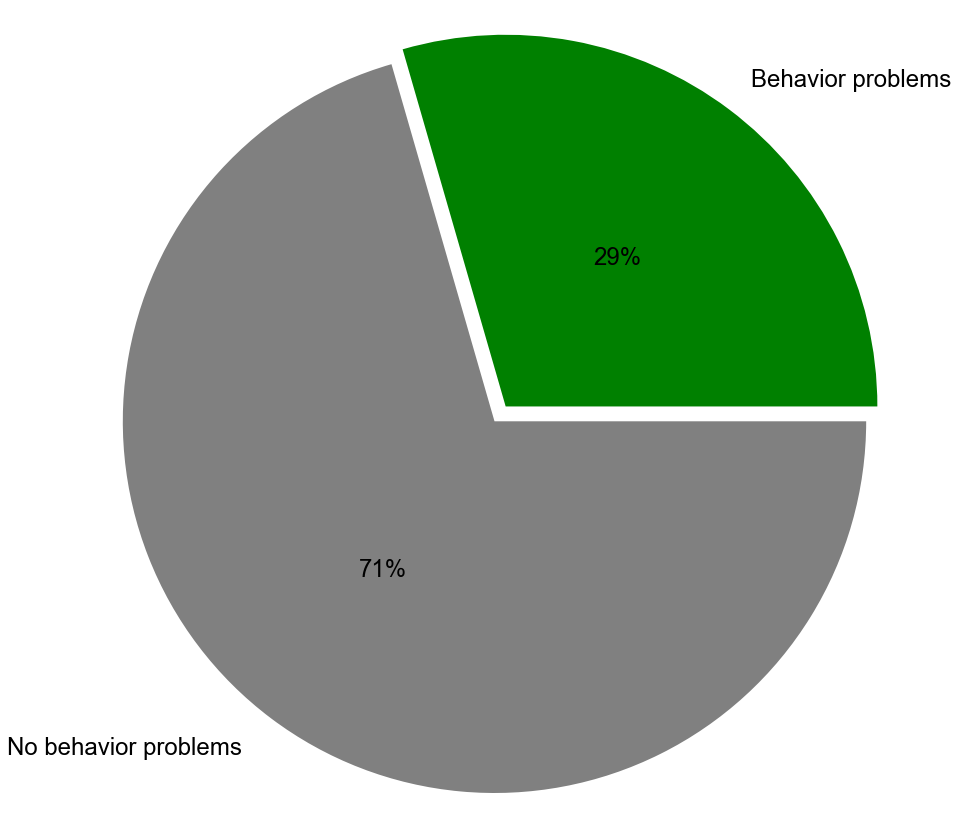

In [14]:
labels = ['Behavior problems', 
         'No behavior problems ']

fig, ax = plt.subplots(figsize=(15, 15))
# plt.figure(figsize=(15, 25))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size'] = 24

colors = ['green', 'grey']
percentages = [29.47, 70.53]
explode=(0.05, 0)

# theme = plt.get_cmap('Set1')
# ax.set_prop_cycle("color", [theme(2. * i / len(percentages))
#                              for i in range(len(percentages))])



ax.pie(percentages, explode=explode, labels=labels,  
        colors=colors,autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
ax.axis('equal');

# ax.set_title("Percentage of Chilhood Behavior Problems")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("has_problems_pie.png")

In [15]:
## Female and male children
print(df_children.shape)
print('male', round(100 * df_children.loc[df_children['sex'] == 'male'].shape[0]/(df_children.shape[0]),2))
print('female', round(100 * df_children.loc[df_children['sex'] == 'female'].shape[0]/(df_children.shape[0]),2))

(2806, 242)
male 52.57
female 47.33


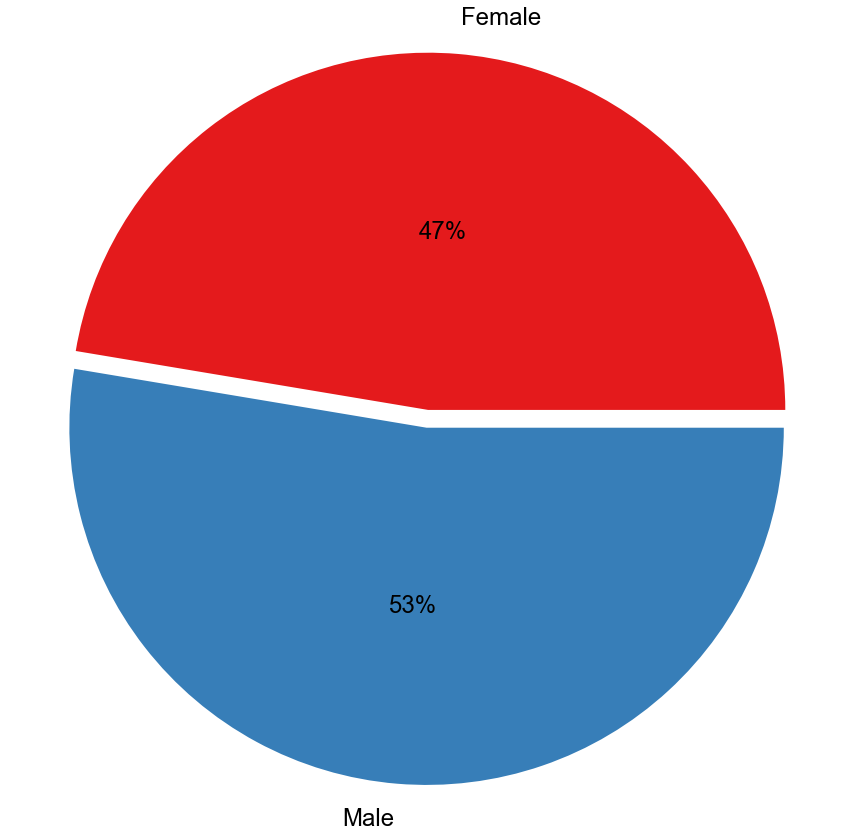

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))

plt.rcParams['font.size'] = 24
labels = ['Female' ,'Male']

percentages = [47.31, 52.58]
explode=(0.05, 0)

theme = plt.get_cmap('Set1')
ax.set_prop_cycle("color", [theme(0.3 * i / len(percentages))
                             for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
ax.axis('equal');

# ax.set_title("Percentage of Chilhood Behavior Problems")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("male_female_pie.png")

In [17]:
df_children_has_problem = df_children.loc[df_children['has_problem'] == 1]
df_children_has_no_problem = df_children.loc[df_children['has_problem'] == 0]
print("Total number of families with kids who has at least one problem:",df_children_has_problem.shape[0])


print('male children has problems', round(100 * df_children_has_problem.loc[df_children_has_problem['sex'] == 'male'].shape[0]/(df_children_has_problem.shape[0]),2))
print('female children has problems', round(100 * df_children_has_problem.loc[df_children_has_problem['sex'] == 'female'].shape[0]/(df_children_has_problem.shape[0]),2))


print(round(100 * df_children_has_no_problem.loc[df_children_has_no_problem['sex'] == 'male'].shape[0]/(df_children_has_no_problem.shape[0]),2))
print(round(100 * df_children_has_no_problem.loc[df_children_has_no_problem['sex'] == 'female'].shape[0]/(df_children_has_no_problem.shape[0]),2))

Total number of families with kids who has at least one problem: 827
male children has problems 61.31
female children has problems 38.69
48.91
50.93


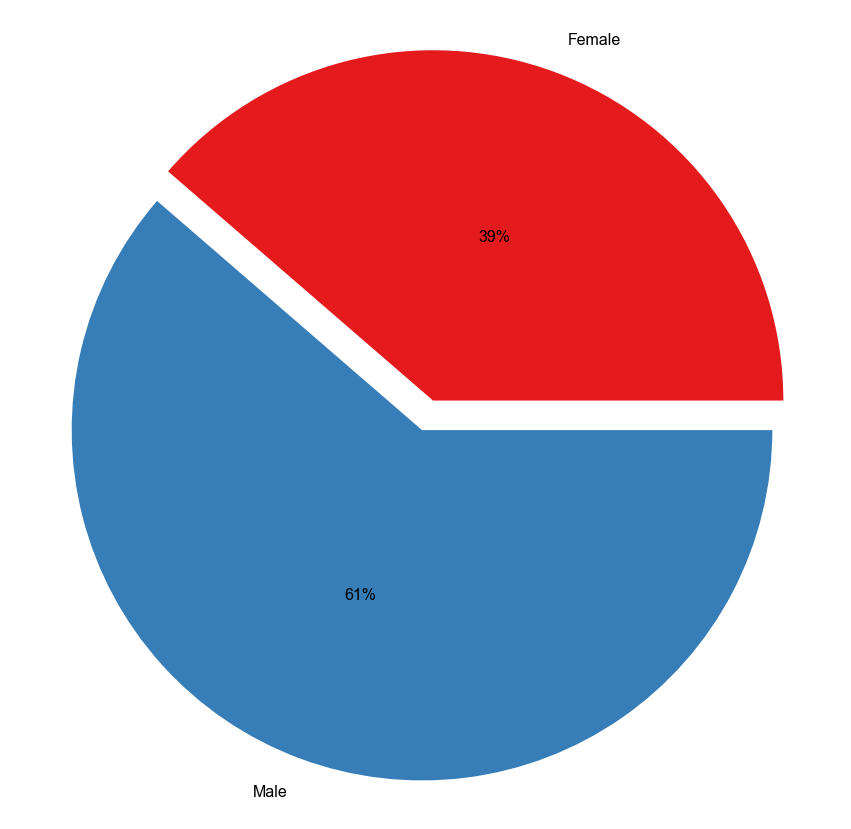

In [18]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams['font.size'] = 16
labels = ['Female' ,'Male']

percentages = [38.65, 61.35]
explode=(0.09, 0)

theme = plt.get_cmap('Set1')
ax.set_prop_cycle("color", [theme(0.3 * i / len(percentages))
                             for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
ax.axis('equal');

# ax.set_title("Percentage of Chilhood Behavior Problems")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("male_female_pie_has_problem.png")

In [19]:
## %male who have problems

29.19*61.35/100

17.908065

In [20]:
## %female who have problems

29.19*38.65/100

11.281935

In [21]:
## %male who have no problems

70.81*48.96/100

34.668576

In [22]:
## %male who have no problems

70.81*50.89/100

36.035209

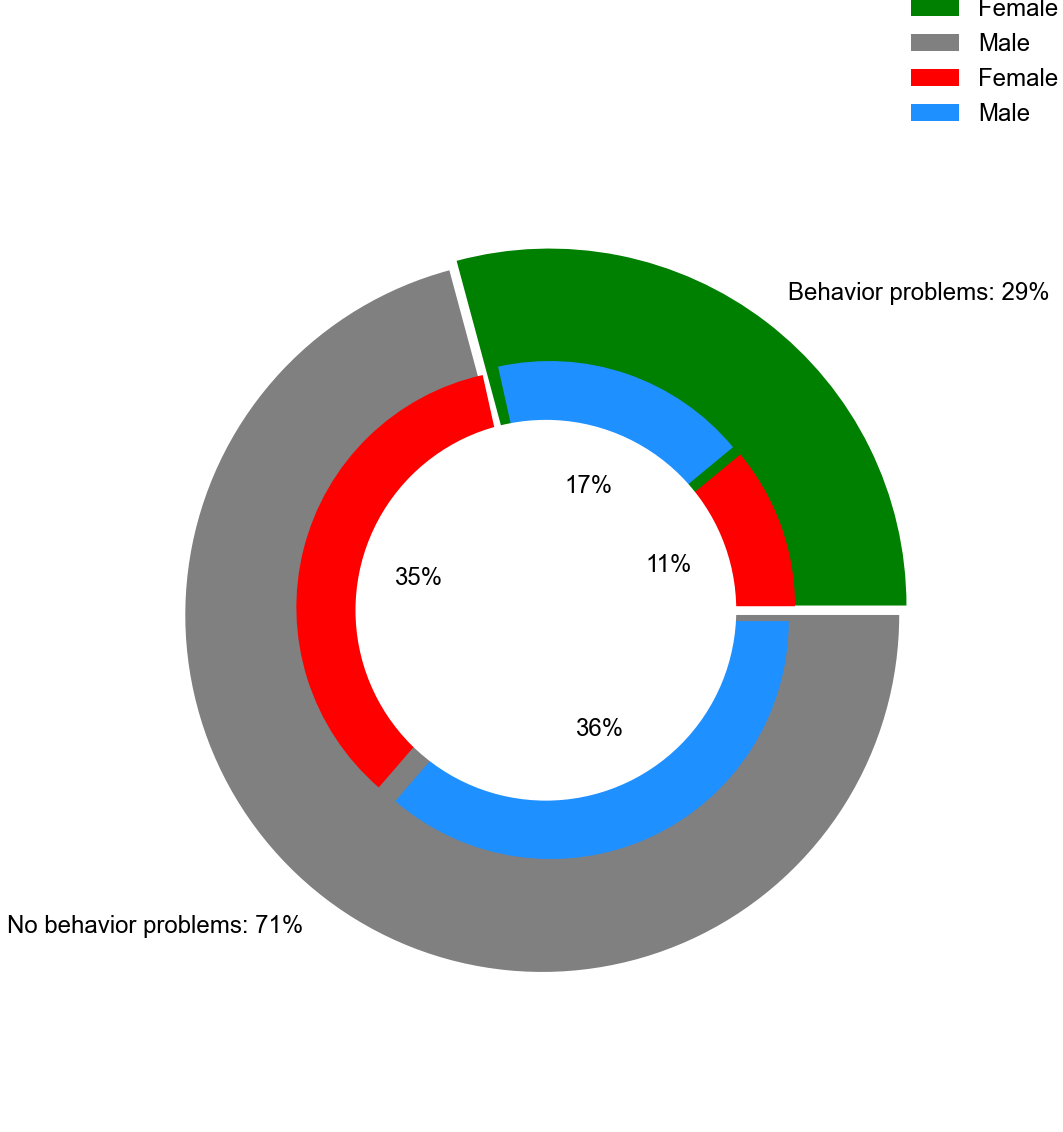

In [23]:
# Data to plot
fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams['font.size'] = 24

labels = ['Behavior problems: 29%', 'No behavior problems: 71%']
sizes = [29.19, 70.81]
labels_gender = ['17.43%' ,'36.61%', '31.13%' ,'34.67%']
sizes_gender = [11.28, 17.90, 36.04, 37.23]
colors = ['green', 'grey']
colors_gender = ['red','dodgerblue']
explode = (0.05,0.05) 
explode_gender = (0.1,0.1,0.1,0.1)
#Plot
ax.pie(sizes, labels = labels, colors=colors, startangle = 0,frame=True, explode=explode,radius=3, shadow=False,   
       pctdistance=0,labeldistance=1.1)
ax.pie(sizes_gender,  colors = colors_gender,startangle = 0, explode=explode_gender,radius=2, shadow=False,   
       autopct='%1.0f%%',pctdistance=0.5 )
#Draw circle
centre_circle = plt.Circle((0,0),1.6,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
fig.tight_layout()
fig.legend(['Female', 'Male', 'Female', 'Male'], frameon=False, bbox_to_anchor=(1, 1.07)) 

plt.savefig("cool_pie.png")
plt.show()


In [24]:
refined_df = df_type_has_problem[['unique_id', 'Child#','sex', 'has_problem', 'type']]
refined_df = refined_df.sort_values(by=['unique_id'])
grouped_df = refined_df.groupby(by = ['unique_id','Child#','sex']).sum().reset_index()
print(grouped_df.shape)

(827, 4)


In [25]:
grouped_df_male = grouped_df.loc[grouped_df['sex'] == 'male']
grouped_df_female = grouped_df.loc[grouped_df['sex'] == 'female']

In [26]:
print('List of boys who have problems', list(grouped_df_male['has_problem'].value_counts())) 
print('List of girls who have problems', list(grouped_df_female['has_problem'].value_counts())) 


List of boys who have problems [211, 101, 30, 30, 28, 28, 25, 23, 17, 7, 5, 1, 1]
List of girls who have problems [173, 43, 31, 23, 16, 14, 7, 6, 5, 1, 1]


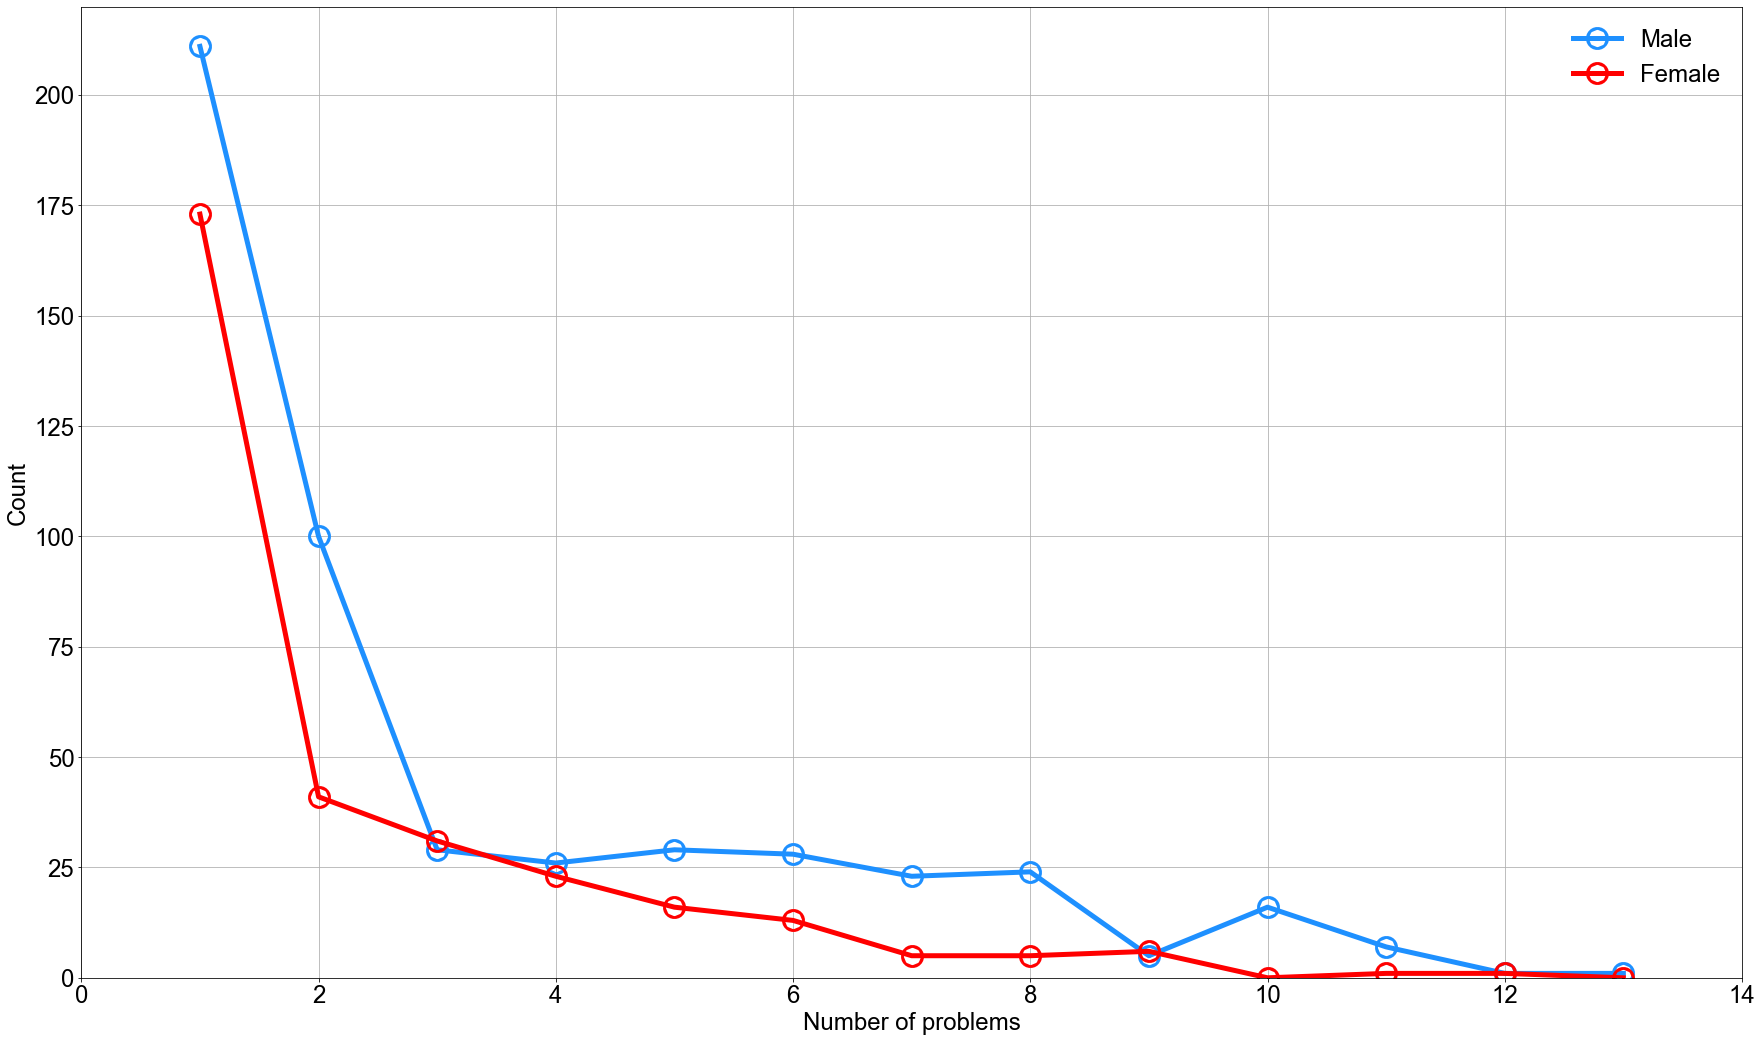

In [27]:

plt.figure(figsize=(25, 15))
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [211, 100, 29, 26, 29, 28, 23, 24, 5, 16, 7, 1, 1], '.-', c='dodgerblue', linewidth=5,mew=20, label = 'Male')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [173, 41, 31, 23, 16, 13, 5, 5, 6, 0, 1, 1, 0],'.-',c='red', linewidth=5,mew=20, label = 'Female')
plt.ylabel("Count",fontsize=24)
plt.xlabel("Number of problems",fontsize=24)
plt.legend(['Male', 'Female'], frameon=False)
plt.xlim(0, 14)
plt.ylim(0, 220)
plt.tight_layout()
plt.savefig("more_than_1problem_has_problem_gender.png")
plt.grid('on')
plt.show()

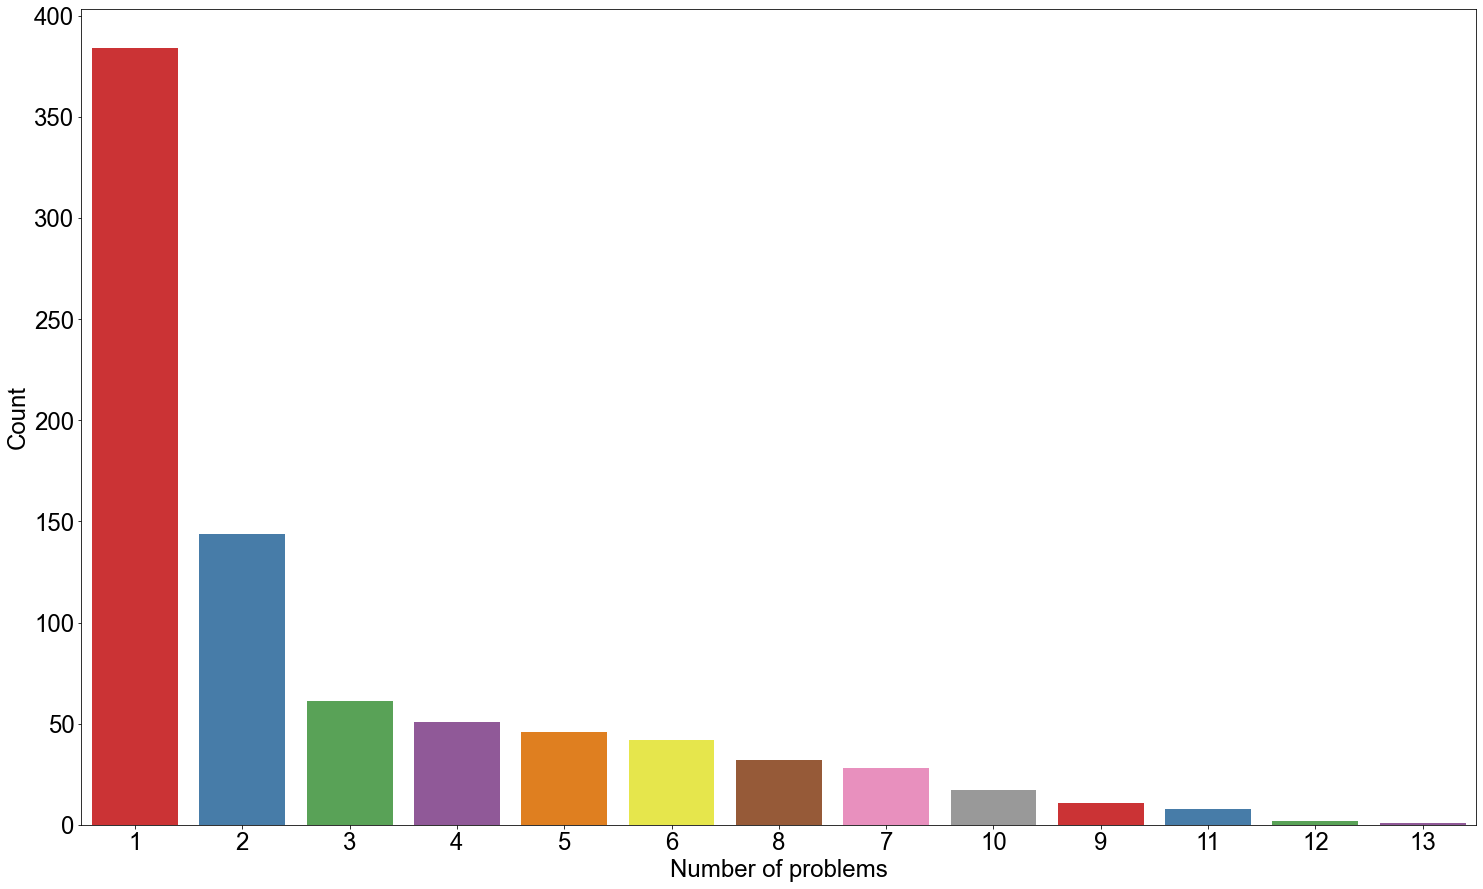

In [28]:

labels = ['1', '2', '3', '4', '5', '6', '8', '7', '10', '9', '11', '12', '13'] 



plt.figure(figsize=(25, 15))

b = sb.countplot(x = "has_problem", data=grouped_df, palette="Set1", order = grouped_df['has_problem'].value_counts().index);
b.set_ylabel("Count",fontsize=24)
b.set_xlabel("Number of problems",fontsize=24)
b.set_xticklabels(labels)
b.tick_params(labelsize=24)

plt.savefig("more_than_1problem_count_has_problem.png")

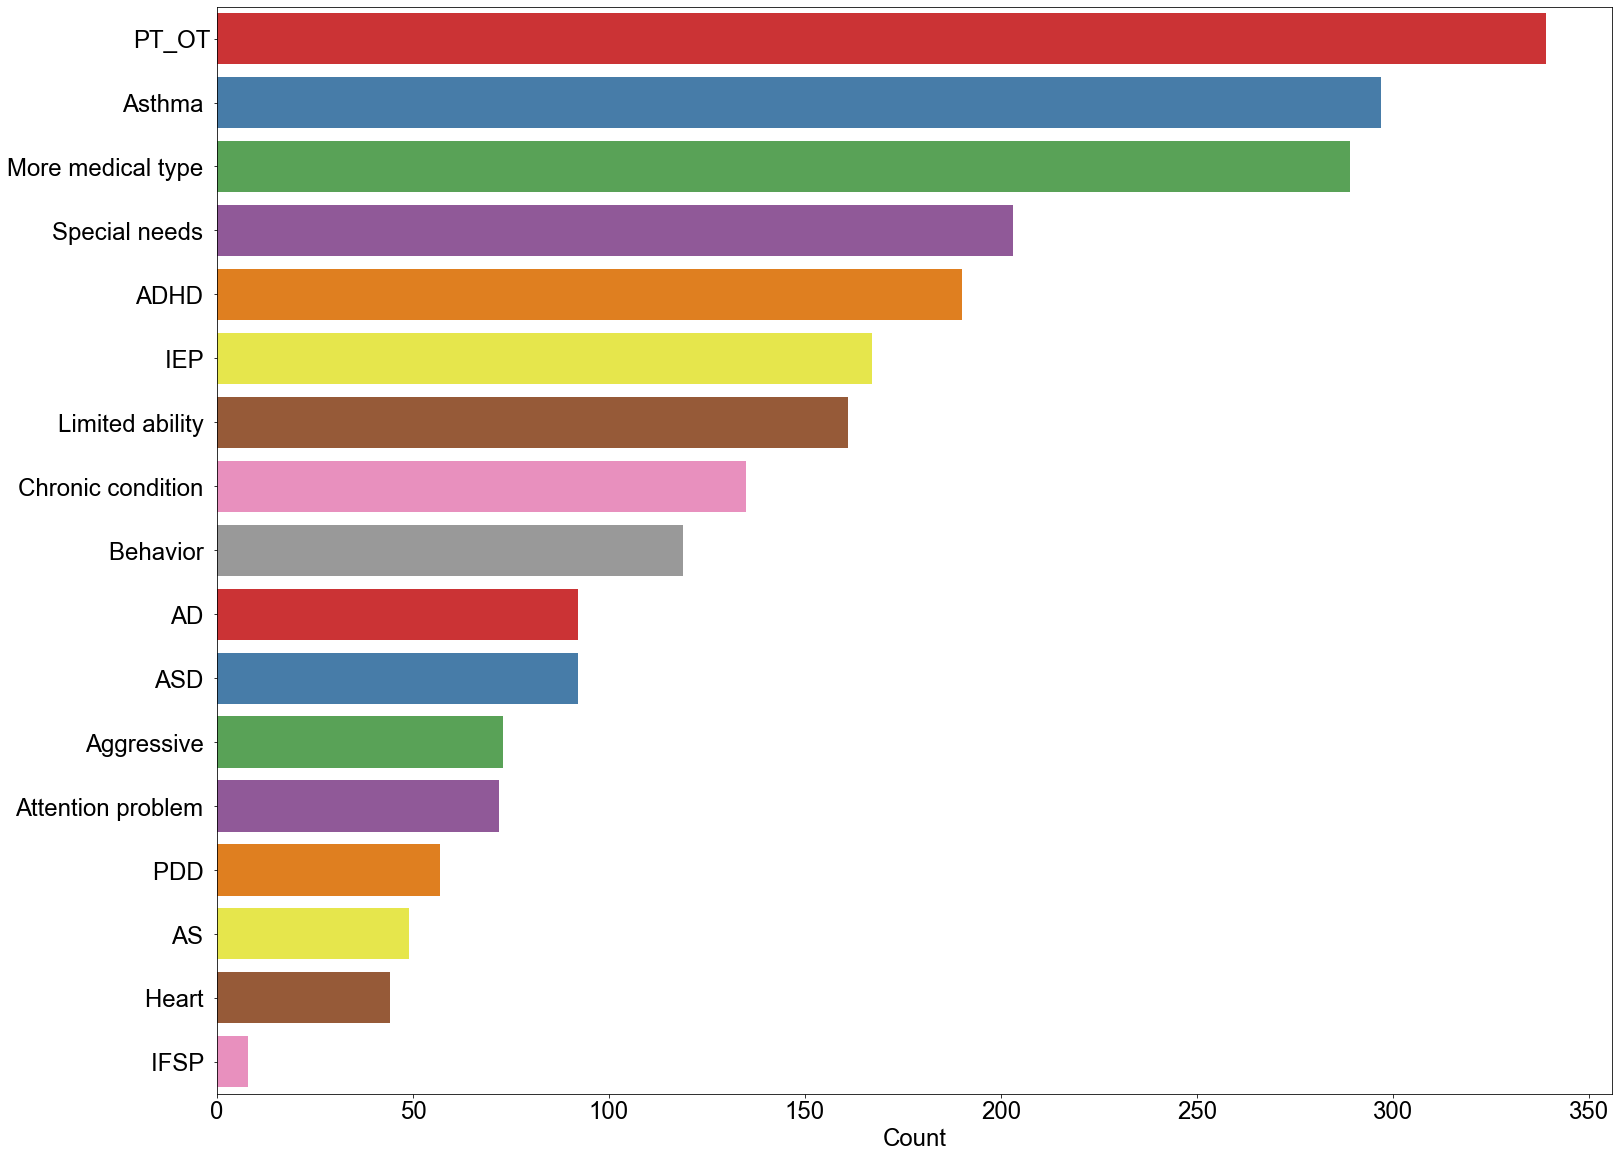

In [29]:
labels = ['PT_OT', 
         'Asthma ',
         'More medical type ',
         'Special needs ',
         'ADHD ',          
         'IEP ',

         'Limited ability ',
         'Chronic condition ',
         'Behavior ',
         'AD ',
         'ASD ',
         'Aggressive ',          
         'Attention problem ',

         'PDD ',
         'AS ',
         'Heart ',
         'IFSP ']

plt.figure(figsize=(25, 20))

b = sb.countplot(y = "type", data=df_type_has_problem, palette="Set1", order = df_type_has_problem['type'].value_counts().index);
b.set_xlabel("Count",fontsize=24)
b.set_ylabel("",fontsize=24)
b.set_yticklabels(labels)
b.tick_params(labelsize=24)
plt.savefig("output.png")

In [62]:

for t in label_type:
    temp_df_type = df_type_has_problem.loc[df_type_has_problem['type'] == t]

    temp_df_male = temp_df_type.loc[temp_df_type['sex'] == 'male']
    temp_df_female = temp_df_type.loc[temp_df_type['sex'] == 'female']
    print(t, round(temp_df_female.shape[0]/temp_df_male.shape[0], 2));

PT/OT 0.47
Asthma 0.74
More medical 0.51
Special needs 0.42
ADHD 0.43
IEP 0.38
Limited ability 0.56
Chronic condition 0.82
Behavior 0.34
AD 0.56
ASD 0.16
Aggressive 0.41
Attention problem 0.62
PDD 0.3
AS 0.09
Heart 0.63
IFSP 0.33


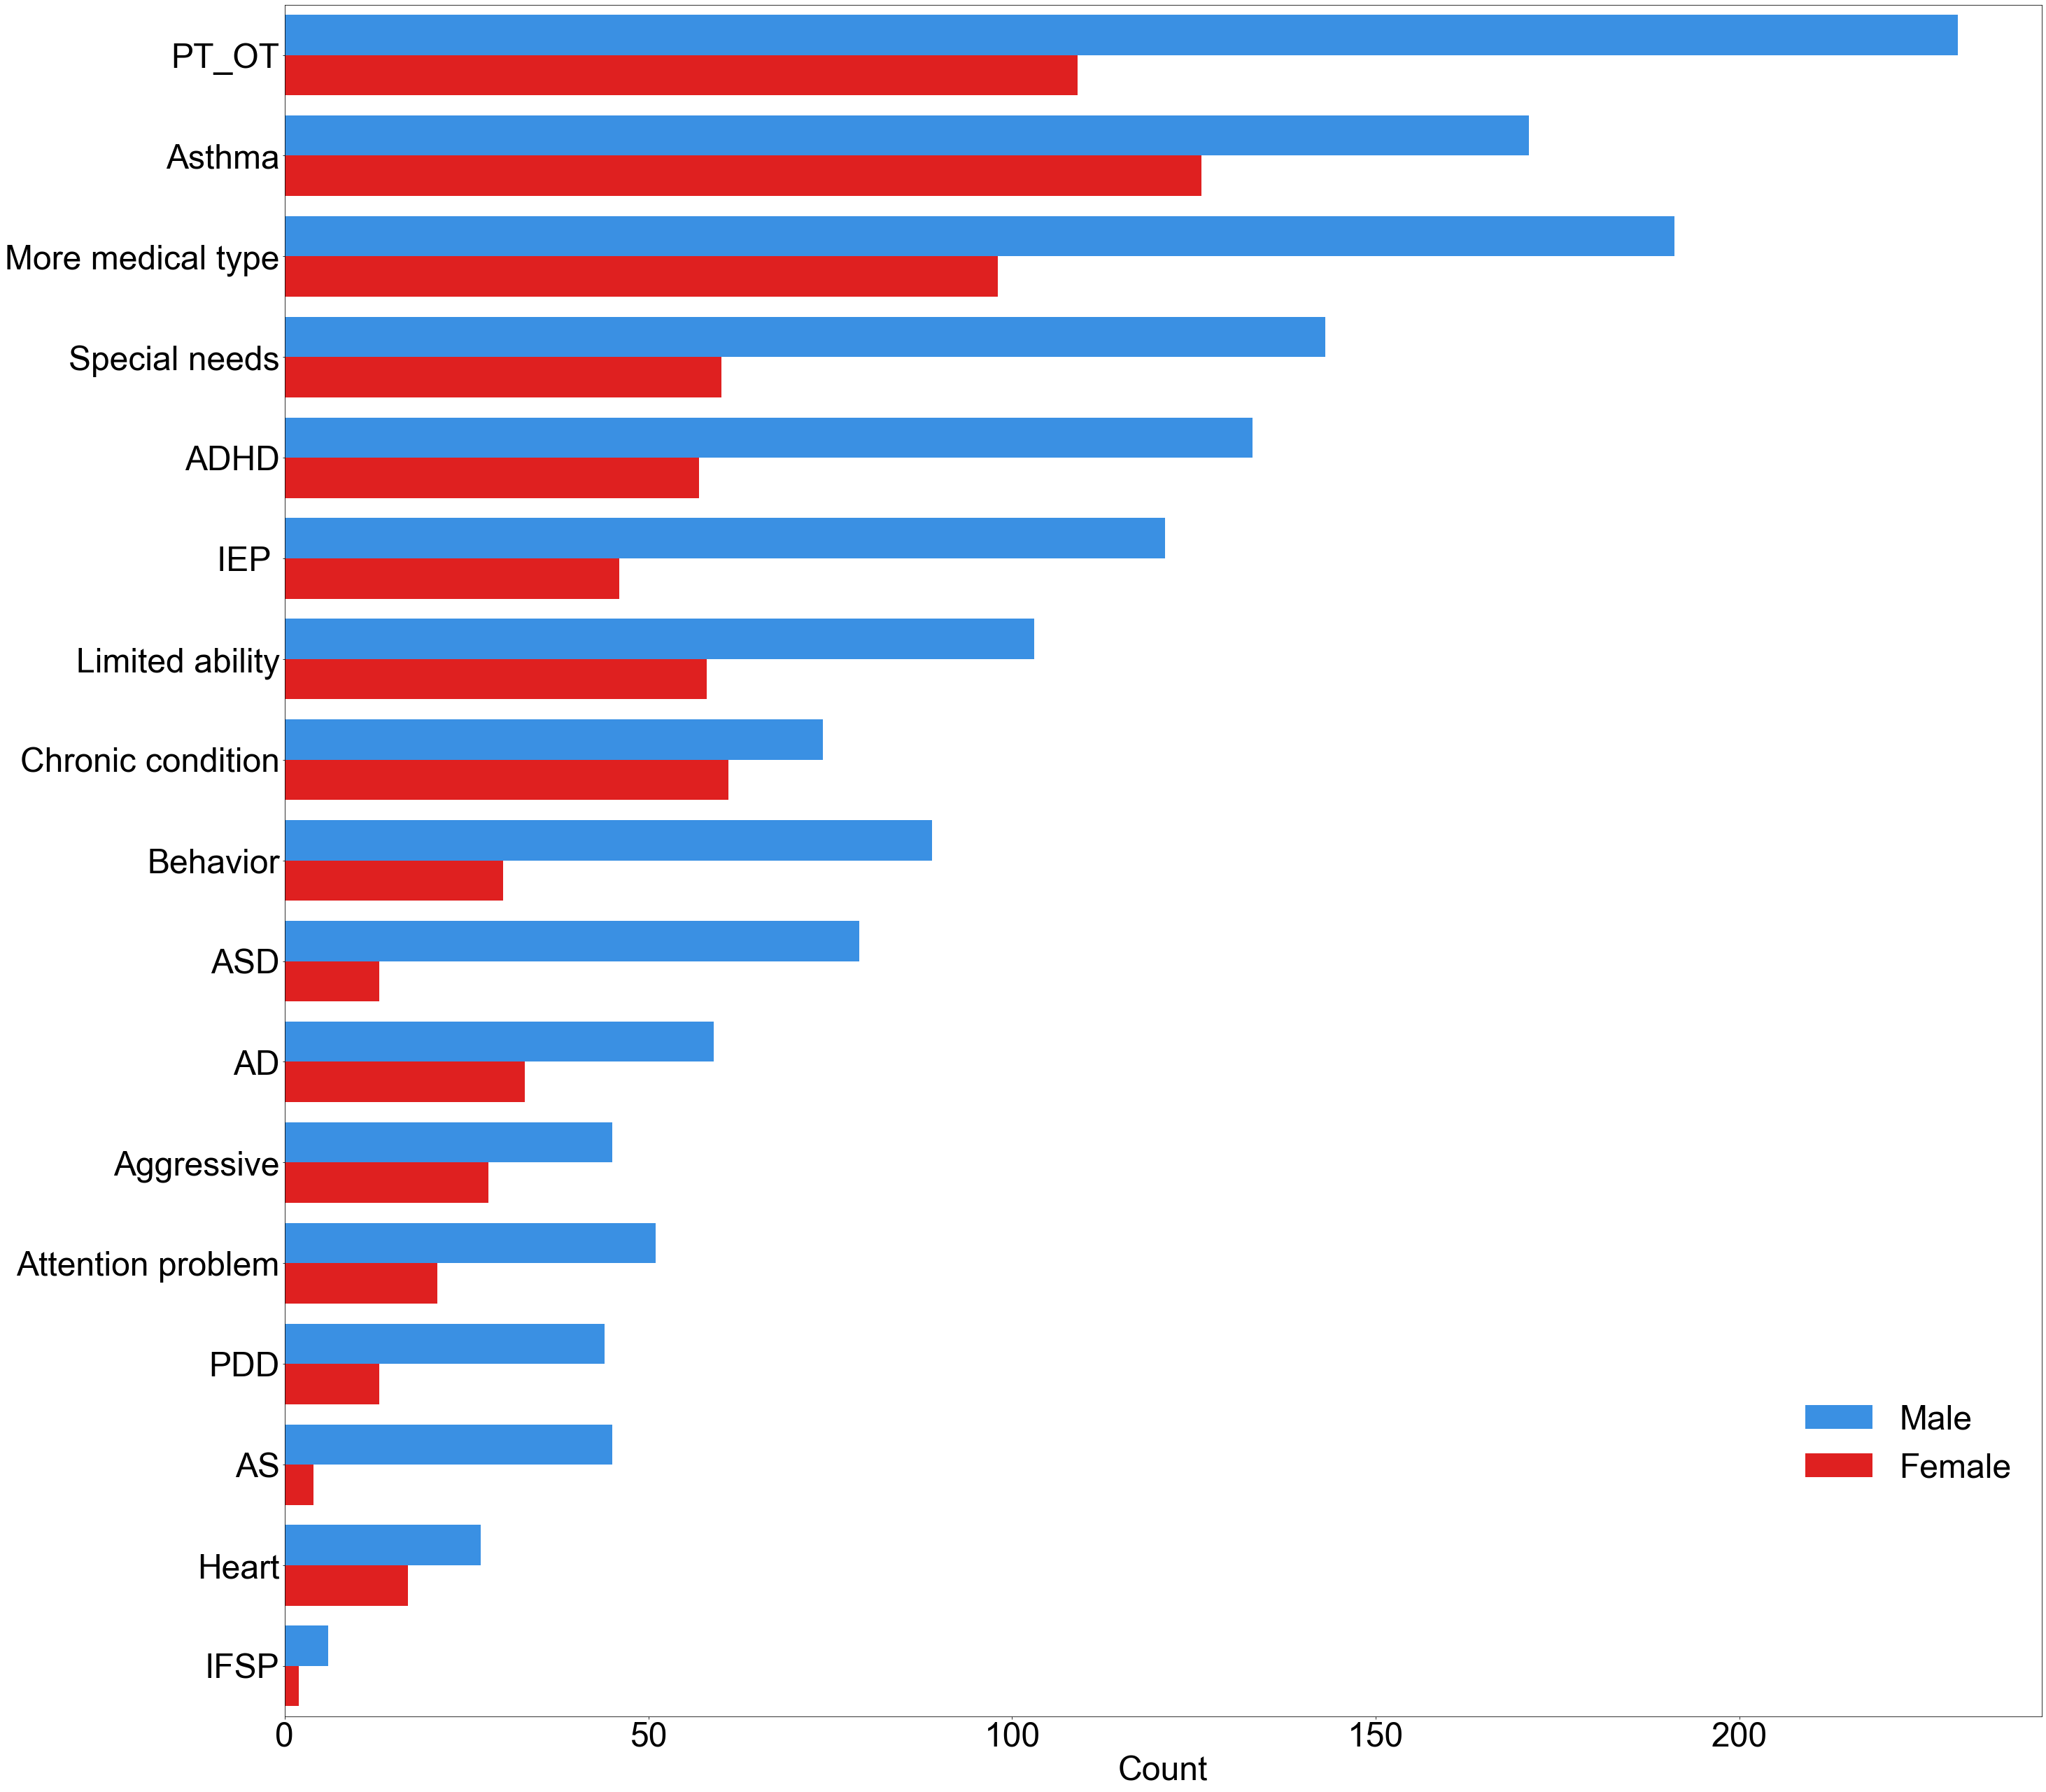

In [30]:
labels = ['PT_OT', 
         'Asthma',
         'More medical type',
         'Special needs',
         'ADHD',          
         'IEP ',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']

color_palette_list = ['dodgerblue', 'red']
# color_palette_list = sb.cubehelix_palette(as_cmap=True)

plt.figure(figsize=(45, 45))
b = sb.countplot(y = "type",hue = "sex", data=df_type_has_problem, palette=color_palette_list, order = df_type_has_problem['type'].value_counts().index);
b.set_xlabel("Count",fontsize=48)
b.set_ylabel("",fontsize=48)
b.set_yticklabels(labels)
b.tick_params(labelsize=48)
b.legend(['Male', 'Female'], frameon=False, bbox_to_anchor=(1, 0.2), fontsize = 48)
plt.savefig("male_female_type.png")

In [31]:
# df_type_has_problem
# get ids of those how has 5 top problems
PT_OT_type = df_type_has_problem.loc[df_type_has_problem['type'] == 'PT/OT']
other_type = df_type_has_problem.loc[df_type_has_problem['type'] != 'PT/OT']

In [32]:
PT_OT_type

,unique_id,age,strata,p3,numkids,two_parent_house,regular_activity,q201,q202,q203,...,Other,Child#,has_problem,type,child_age,sex,hrs/wk in chld care,RACE,num_races,Unemployment
69,137,34.0,MW high,2,2,yes,yes,3,1,2,...,NaN,1,1,PT/OT,5.0,female,5.0,White,1,1
82,142,40.0,S high,2,2,yes,yes,1,2,9,...,NaN,1,1,PT/OT,4.0,female,55.0,White,1,1
83,142,40.0,S high,2,2,yes,yes,1,2,9,...,NaN,2,1,PT/OT,8.0,male,15.0,White,1,0
113,159,37.0,S high,2,2,yes,yes,3,1,1,...,NaN,2,1,PT/OT,2.0,male,6.0,White,1,0
148,182,53.0,S high,1,1,yes,no,4,2,2,...,NaN,1,1,PT/OT,11.0,male,NaN,White,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4186,1448,43.0,W high,1,3,yes,yes,4,1,1,...,NaN,2,1,PT/OT,8.0,male,1.0,White,1,1
4187,1448,43.0,W high,1,3,yes,yes,4,1,1,...,NaN,3,1,PT/OT,12.0,male,1.0,White,1,1
4188,1542,NaN,NaN,2,2,yes,no,4,2,2,...,NaN,1,1,PT/OT,7.0,male,NaN,White,1,0
4189,1542,NaN,NaN,2,2,yes,no,4,2,2,...,NaN,2,1,PT/OT,9.0,female,NaN,White,1,0


In [33]:
PT_OT_type_filtered = pd.DataFrame()
for ids, age in zip(list(PT_OT_type['unique_id']), list(PT_OT_type['child_age'])):
    temp = other_type[other_type['unique_id'] == ids]
    temp = temp[temp['child_age'] == age]
    PT_OT_type_filtered = PT_OT_type_filtered.append(temp)
    
    
    

In [34]:
types = [ 
         'Asthma',
         'More medical',
         'Special needs',
         'ADHD',          
         'IEP',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']

In [35]:
types_percentages = {}
for t in types:
    types_percentages[t] = (round(100 * PT_OT_type_filtered.loc[PT_OT_type_filtered['type'] == t].shape[0]/(PT_OT_type_filtered.shape[0]),4))
    
    print(t, round(100 * PT_OT_type_filtered.loc[PT_OT_type_filtered['type'] == t].shape[0]/(PT_OT_type_filtered.shape[0]),4))
sorted_types_percentages = sorted(types_percentages.items(), key=lambda kv: kv[1])
sorted_types_percentages = collections.OrderedDict(sorted_types_percentages)
print(PT_OT_type.shape[0])

Asthma 4.4882
More medical 15.9843
Special needs 13.0709
ADHD 7.7953
IEP 11.5748
Limited ability 9.685
Chronic condition 4.5669
Behavior 7.2441
ASD 6.2205
AD 5.0394
Aggressive 3.937
Attention problem 2.2835
PDD 4.0157
AS 2.7559
Heart 0.7874
IFSP 0.5512
339


In [36]:
print(list(sorted_types_percentages.keys()))

['IFSP', 'Heart', 'Attention problem', 'AS', 'Aggressive', 'PDD', 'Asthma', 'Chronic condition', 'AD', 'ASD', 'Behavior', 'ADHD', 'Limited ability', 'IEP', 'Special needs', 'More medical']


In [37]:
print(list(sorted_types_percentages.keys())[::-1])
print(sum(list(sorted_types_percentages.values())[::-1]))

['More medical', 'Special needs', 'IEP', 'Limited ability', 'ADHD', 'Behavior', 'ASD', 'AD', 'Chronic condition', 'Asthma', 'PDD', 'Aggressive', 'AS', 'Attention problem', 'Heart', 'IFSP']
100.0001


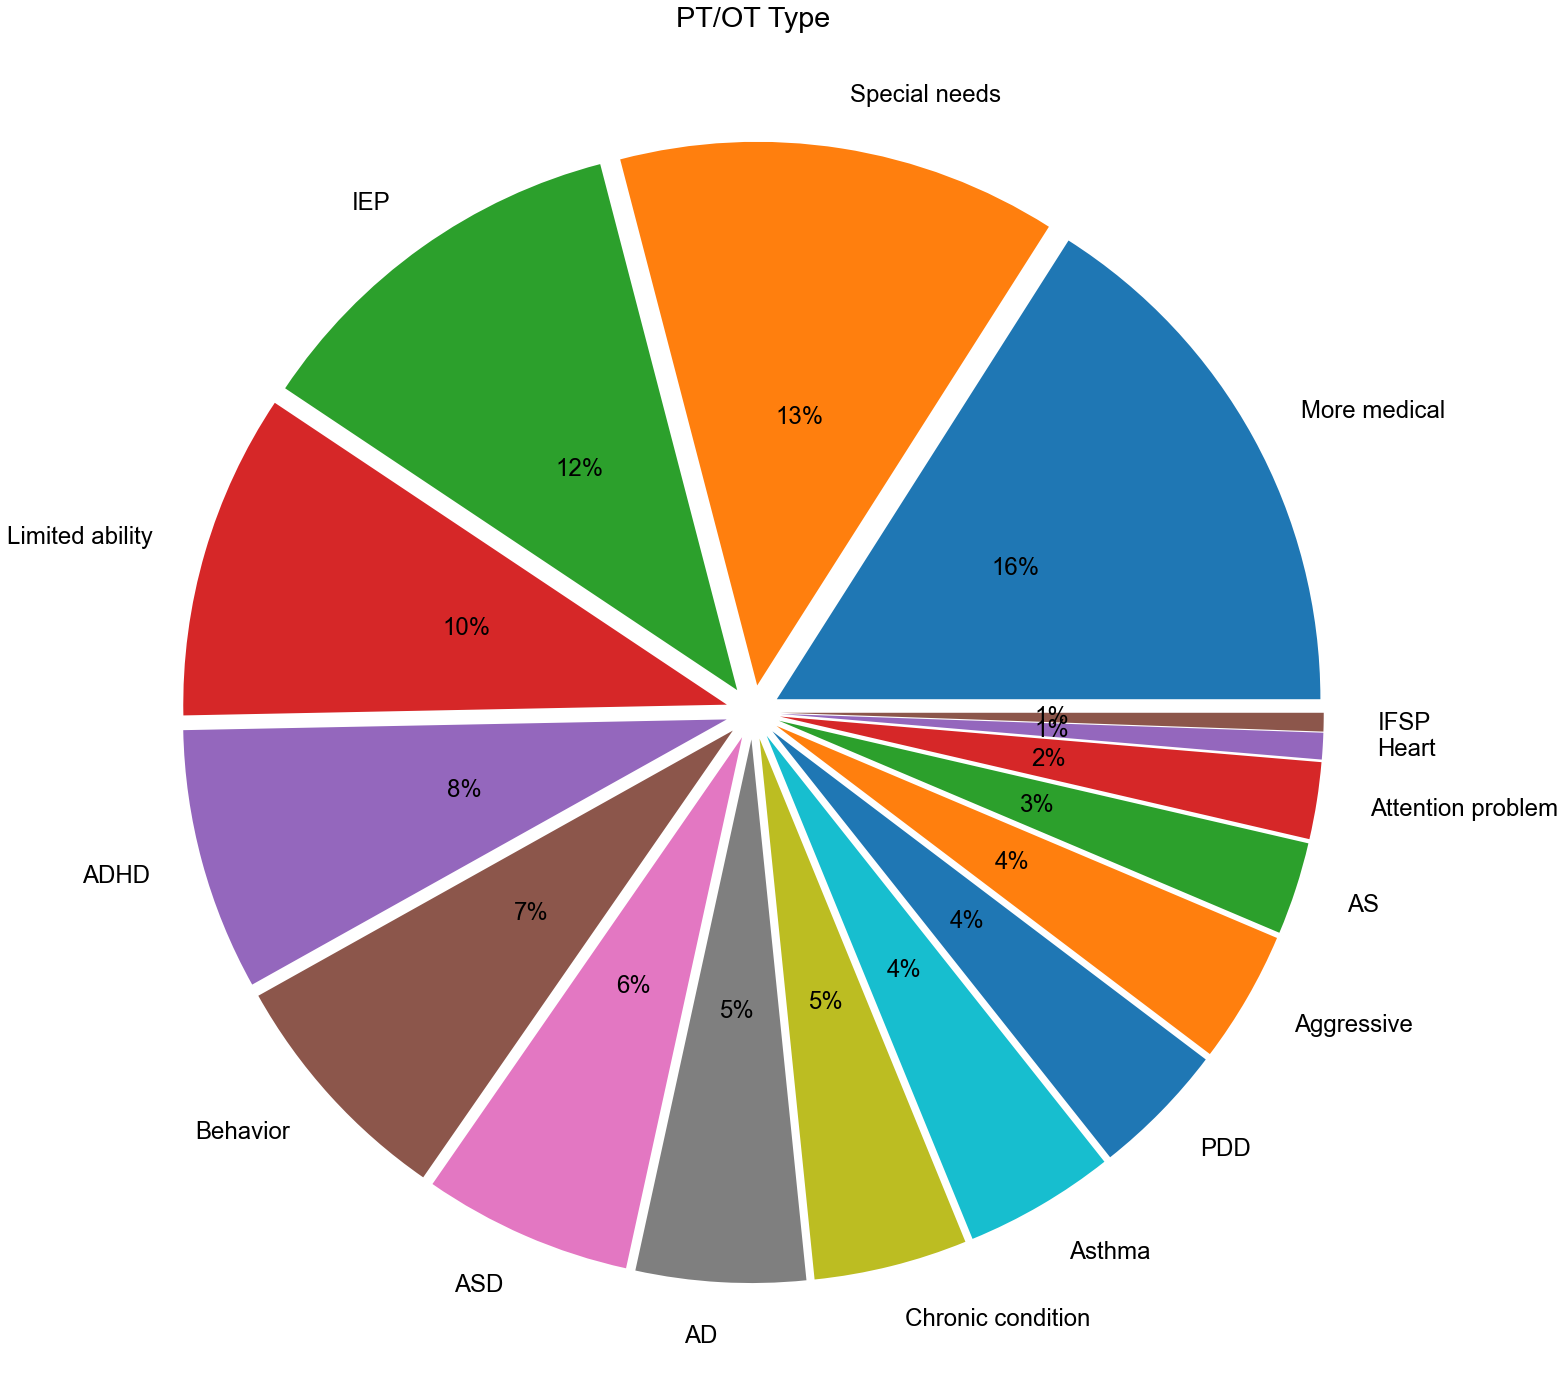

In [38]:
fig, ax = plt.subplots(figsize=(25, 25))

plt.rcParams['font.size'] = 24
labels = list(sorted_types_percentages.keys())[::-1]

percentages = list(sorted_types_percentages.values())[::-1]
explode=[0.05] * len(labels)


ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
# ax.axis('equal')

ax.set_title("PT/OT Type")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("PT_OT_type.png")

In [39]:
Asthma_type = df_type_has_problem.loc[df_type_has_problem['type'] == 'Asthma']
other_type = df_type_has_problem.loc[df_type_has_problem['type'] != 'Asthma']
Asthma_type_filtered = pd.DataFrame() 
for ids, age in zip(list(Asthma_type['unique_id']), list(Asthma_type['child_age'])):
    temp = other_type[other_type['unique_id'] == ids]
    temp = temp[temp['child_age'] == age]
    Asthma_type_filtered = Asthma_type_filtered.append(temp)
    
Asthma_type_filtered

,unique_id,age,strata,p3,numkids,two_parent_house,regular_activity,q201,q202,q203,...,Other,Child#,has_problem,type,child_age,sex,hrs/wk in chld care,RACE,num_races,Unemployment
3227,115,48.0,S high,2,1,yes,no,4,2,2,...,yes,1,1,Chronic condition,13.0,male,NaN,Mix,2,0
3231,203,37.0,S high,2,2,yes,yes,2,2,2,...,NaN,2,1,Chronic condition,11.0,male,15.0,White,1,0
3539,203,37.0,S high,2,2,yes,yes,2,2,2,...,NaN,2,1,More medical,11.0,male,15.0,White,1,0
3235,231,29.0,S low,2,2,no,yes,3,1,1,...,NaN,1,1,Chronic condition,2.0,female,45.0,White,1,1
3543,231,29.0,S low,2,2,no,yes,3,1,1,...,NaN,1,1,More medical,2.0,female,45.0,White,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,668,NaN,NaN,2,2,yes,yes,3,1,1,...,NaN,1,1,IEP,8.0,male,3.0,White,1,1
996,668,NaN,NaN,2,2,yes,yes,3,1,1,...,NaN,2,1,ASD,9.0,male,3.0,White,1,0
3373,668,NaN,NaN,2,2,yes,yes,3,1,1,...,NaN,2,1,Special needs,9.0,male,3.0,White,1,0
3832,668,NaN,NaN,2,2,yes,yes,3,1,1,...,NaN,2,1,Limited ability,9.0,male,3.0,White,1,0


['More medical', 'PT/OT', 'Chronic condition', 'Special needs', 'ADHD', 'IEP', 'Limited ability', 'Behavior', 'Aggressive', 'AD', 'ASD', 'Attention problem', 'Heart', 'AS', 'PDD', 'IFSP']
[14.62, 12.26, 11.4, 9.68, 9.25, 7.31, 6.88, 5.81, 4.73, 4.73, 4.3, 2.8, 2.15, 2.15, 1.72, 0.22]
297


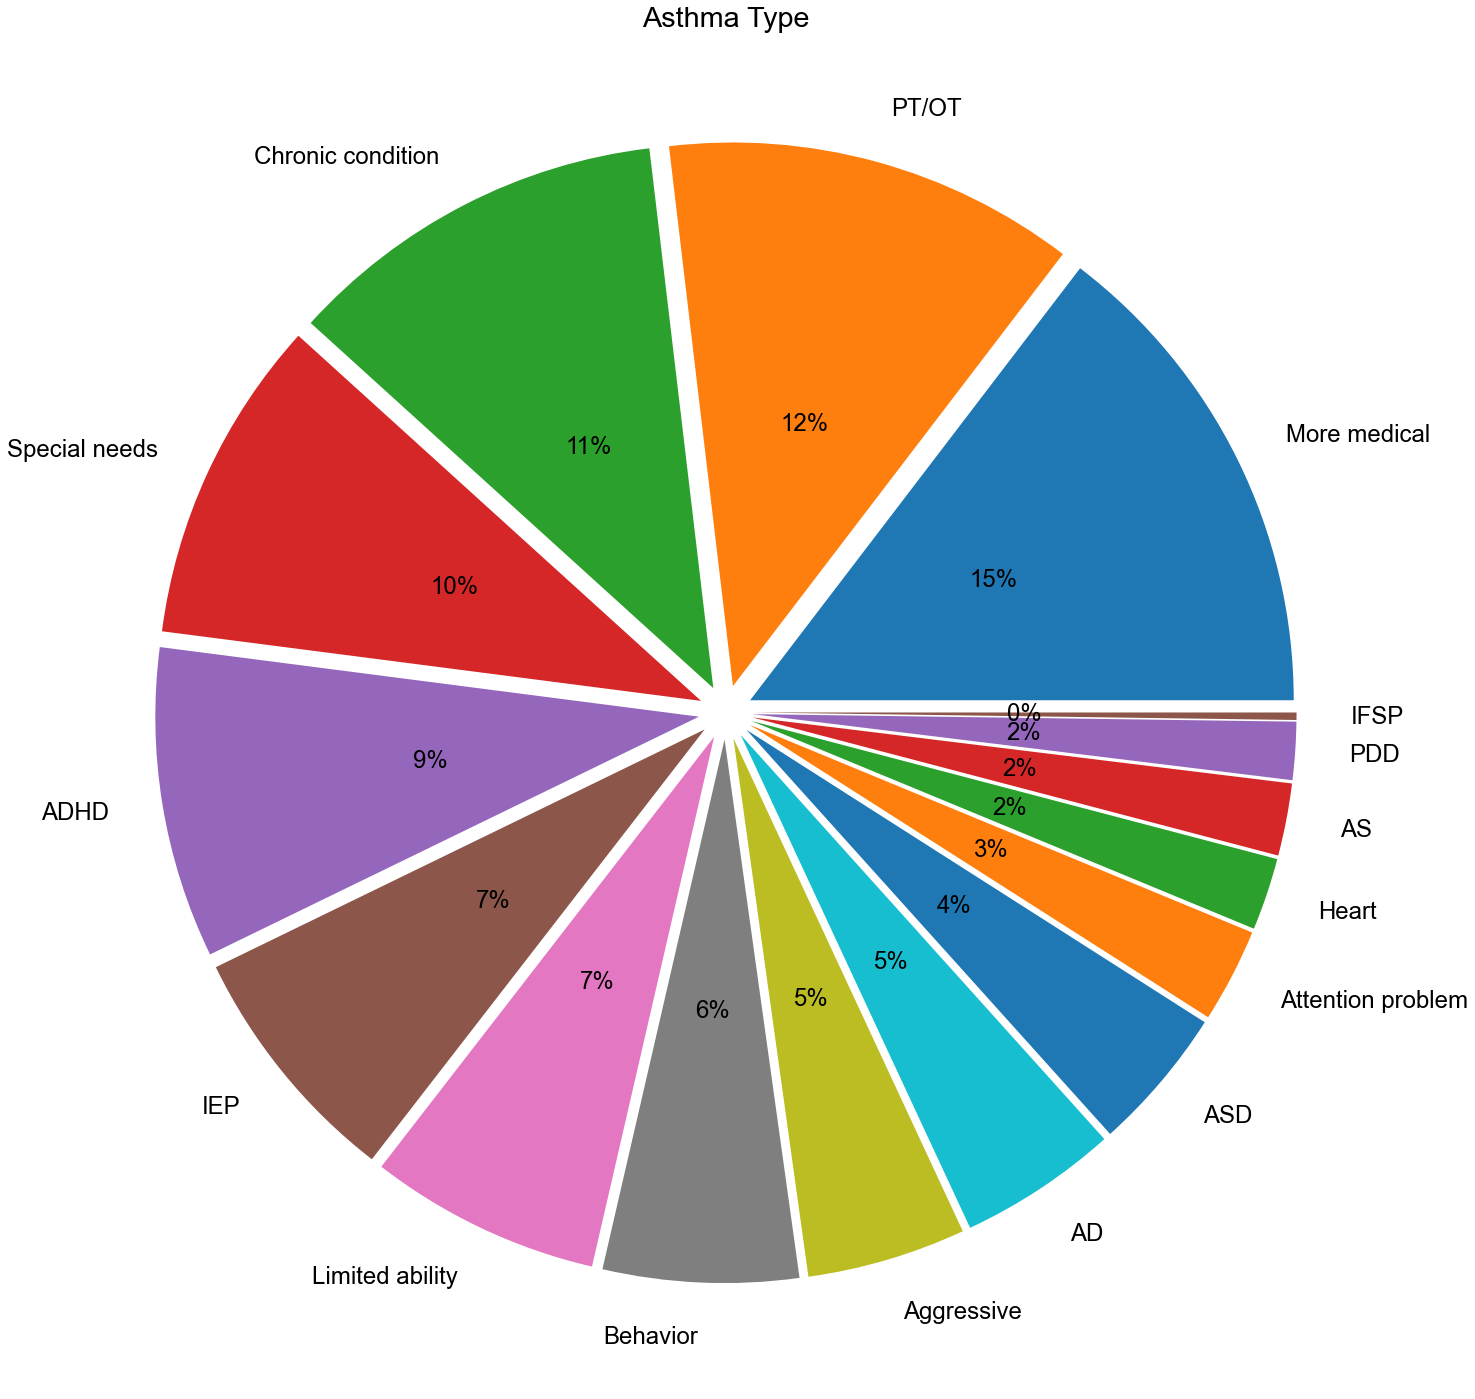

In [40]:
types = ['PT/OT', 
         
         'More medical',
         'Special needs',
         'ADHD',          
         'IEP',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']


types_percentages = {}
for t in types:
    types_percentages[t] = (round(100 * Asthma_type_filtered.loc[Asthma_type_filtered['type'] == t].shape[0]/(Asthma_type_filtered.shape[0]),2))
    

sorted_types_percentages = sorted(types_percentages.items(), key=lambda kv: kv[1])
sorted_types_percentages = collections.OrderedDict(sorted_types_percentages)

print(list(sorted_types_percentages.keys())[::-1])
print(list(sorted_types_percentages.values())[::-1])
print((Asthma_type.shape[0]))
fig, ax = plt.subplots(figsize=(25, 25))

plt.rcParams['font.size'] = 24
labels = list(sorted_types_percentages.keys())[::-1]

percentages = list(sorted_types_percentages.values())[::-1]
explode=[0.05] * len(labels)

# theme = plt.get_cmap('Set1')
# ax.set_prop_cycle("color", [theme(1.1 * i / len(percentages))
#                              for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
# ax.axis('equal');

ax.set_title("Asthma Type")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("Asthma_typetype.png")

In [41]:

More_medical_type = df_type_has_problem.loc[df_type_has_problem['type'] == 'More medical']
other_type = df_type_has_problem.loc[df_type_has_problem['type'] != 'More medical']
More_medical_type_filtered = pd.DataFrame() 

for ids, age in zip(list(More_medical_type['unique_id']), list(More_medical_type['child_age'])):
    temp = other_type[other_type['unique_id'] == ids]
    temp = temp[temp['child_age'] == age]
    More_medical_type_filtered = More_medical_type_filtered.append(temp)
    
More_medical_type_filtered

,unique_id,age,strata,p3,numkids,two_parent_house,regular_activity,q201,q202,q203,...,Other,Child#,has_problem,type,child_age,sex,hrs/wk in chld care,RACE,num_races,Unemployment
3930,163,52.0,W high,2,1,yes,yes,4,2,2,...,NaN,1,1,PT/OT,7.0,male,0.0,White,1,0
3950,298,36.0,MW high,2,2,yes,no,4,2,2,...,NaN,1,1,PT/OT,5.0,male,NaN,White,1,0
3820,528,28.0,MW low,2,1,no,yes,3,2,1,...,NaN,1,1,Limited ability,2.0,male,42.0,White,1,0
3988,528,28.0,MW low,2,1,no,yes,3,2,1,...,NaN,1,1,PT/OT,2.0,male,42.0,White,1,0
3995,605,37.0,MW high,2,3,yes,yes,2,2,2,...,NaN,2,1,PT/OT,8.0,male,10.0,White,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,1448,43.0,W high,1,3,yes,yes,4,1,1,...,NaN,3,1,AD,12.0,male,1.0,White,1,1
2964,1448,43.0,W high,1,3,yes,yes,4,1,1,...,NaN,3,1,AS,12.0,male,1.0,White,1,1
3028,1448,43.0,W high,1,3,yes,yes,4,1,1,...,NaN,3,1,ASD,12.0,male,1.0,White,1,1
3194,1448,43.0,W high,1,3,yes,yes,4,1,1,...,NaN,3,1,Asthma,12.0,male,1.0,White,1,1


['PT/OT', 'Special needs', 'IEP', 'Limited ability', 'ADHD', 'Behavior', 'Chronic condition', 'ASD', 'Asthma', 'AD', 'Aggressive', 'PDD', 'AS', 'Attention problem', 'Heart', 'IFSP']
[16.28, 12.59, 10.43, 9.54, 8.18, 6.42, 6.17, 5.77, 5.45, 4.89, 3.77, 3.69, 2.89, 2.33, 0.96, 0.64]
289


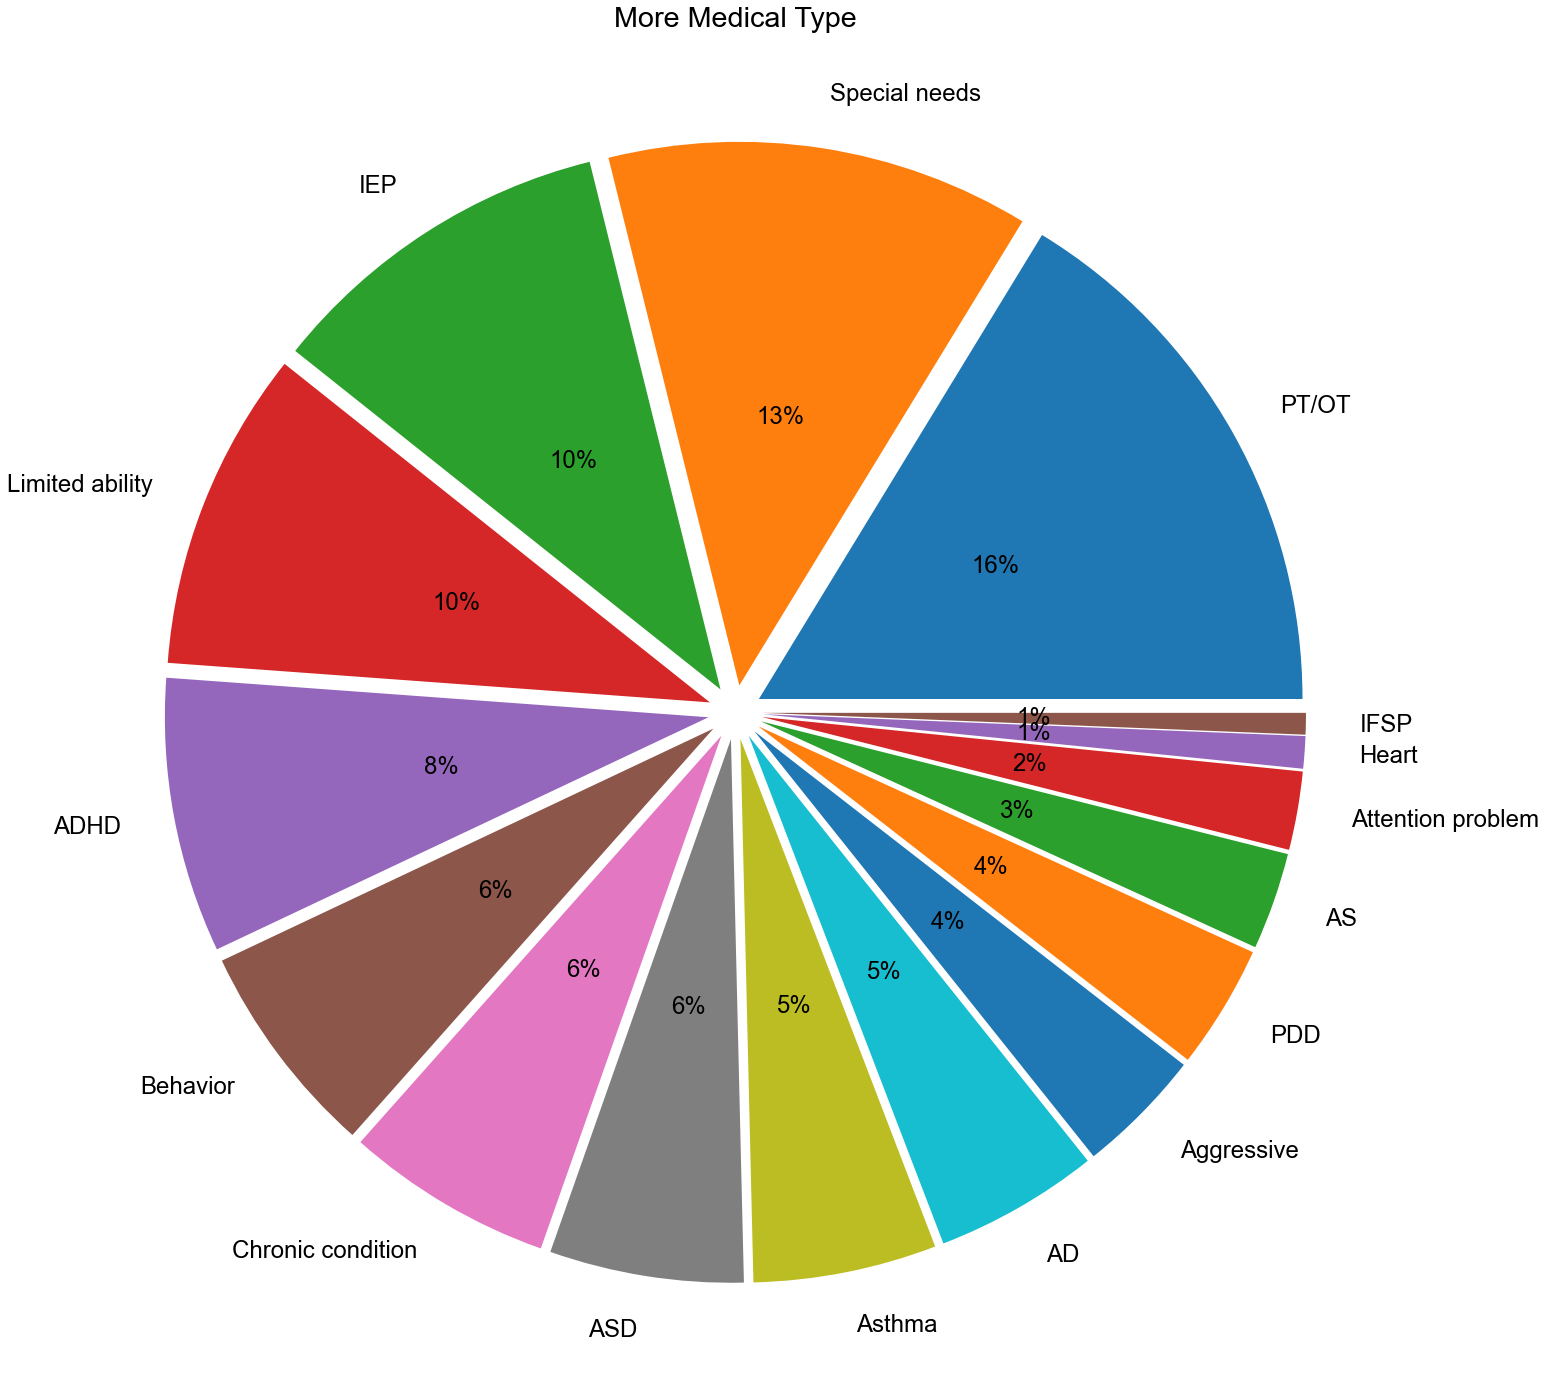

In [42]:
types = ['PT/OT', 
         'Asthma',
         
         'Special needs',
         'ADHD',          
         'IEP',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']


types_percentages = {}
for t in types:
    types_percentages[t] = (round(100 * More_medical_type_filtered.loc[More_medical_type_filtered['type'] == t].shape[0]/(More_medical_type_filtered.shape[0]),2))
    

sorted_types_percentages = sorted(types_percentages.items(), key=lambda kv: kv[1])
sorted_types_percentages = collections.OrderedDict(sorted_types_percentages)

print(list(sorted_types_percentages.keys())[::-1])
print(list(sorted_types_percentages.values())[::-1])
print(More_medical_type.shape[0])
fig, ax = plt.subplots(figsize=(25, 25))

plt.rcParams['font.size'] = 24
labels = list(sorted_types_percentages.keys())[::-1]

percentages = list(sorted_types_percentages.values())[::-1]
explode=[0.05] * len(labels)

# theme = plt.get_cmap('Set1')
# ax.set_prop_cycle("color", [theme(1.1 * i / len(percentages))
#                              for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
# ax.axis('equal');

ax.set_title("More Medical Type")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("More_medical_type.png")

In [43]:
Special_needs_type = df_type_has_problem.loc[df_type_has_problem['type'] == 'Special needs']
other_type = df_type_has_problem.loc[df_type_has_problem['type'] != 'Special needs']
Special_needs_type_filtered = pd.DataFrame() 

for ids, age in zip(list(Special_needs_type['unique_id']), list(Special_needs_type['child_age'])):
    temp = other_type[other_type['unique_id'] == ids]
    temp = temp[temp['child_age'] == age]
    Special_needs_type_filtered = Special_needs_type_filtered.append(temp)
    
Special_needs_type_filtered

,unique_id,age,strata,p3,numkids,two_parent_house,regular_activity,q201,q202,q203,...,Other,Child#,has_problem,type,child_age,sex,hrs/wk in chld care,RACE,num_races,Unemployment
3485,192,54.0,MW low,2,1,yes,no,4,2,2,...,NaN,1,1,Attention problem,8.0,female,NaN,White,1,0
3936,192,54.0,MW low,2,1,yes,no,4,2,2,...,NaN,1,1,PT/OT,8.0,female,NaN,White,1,0
4200,192,54.0,MW low,2,1,yes,no,4,2,2,...,NaN,1,1,IEP,8.0,female,NaN,White,1,0
3541,218,40.0,MW high,2,2,yes,no,4,2,1,...,NaN,2,1,More medical,11.0,male,NaN,White,1,0
3734,412,41.0,Autistic child,1,2,yes,yes,3,2,1,...,NaN,2,1,More medical,9.0,female,15.0,White,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768,1328,42.0,Autistic child,1,2,yes,yes,3,1,1,...,NaN,2,1,More medical,7.0,male,20.0,White,1,1
3920,1328,42.0,Autistic child,1,2,yes,yes,3,1,1,...,NaN,2,1,Limited ability,7.0,male,20.0,White,1,1
4182,1328,42.0,Autistic child,1,2,yes,yes,3,1,1,...,NaN,2,1,PT/OT,7.0,male,20.0,White,1,1
4355,1328,42.0,Autistic child,1,2,yes,yes,3,1,1,...,NaN,2,1,IEP,7.0,male,20.0,White,1,1


['PT/OT', 'IEP', 'More medical', 'Limited ability', 'ASD', 'ADHD', 'Behavior', 'Chronic condition', 'PDD', 'Asthma', 'Aggressive', 'AD', 'AS', 'Attention problem', 'IFSP', 'Heart']
[14.82, 14.2, 14.02, 10.18, 7.32, 6.52, 6.34, 4.82, 4.55, 4.02, 3.66, 3.39, 2.95, 1.79, 0.71, 0.71]
1120


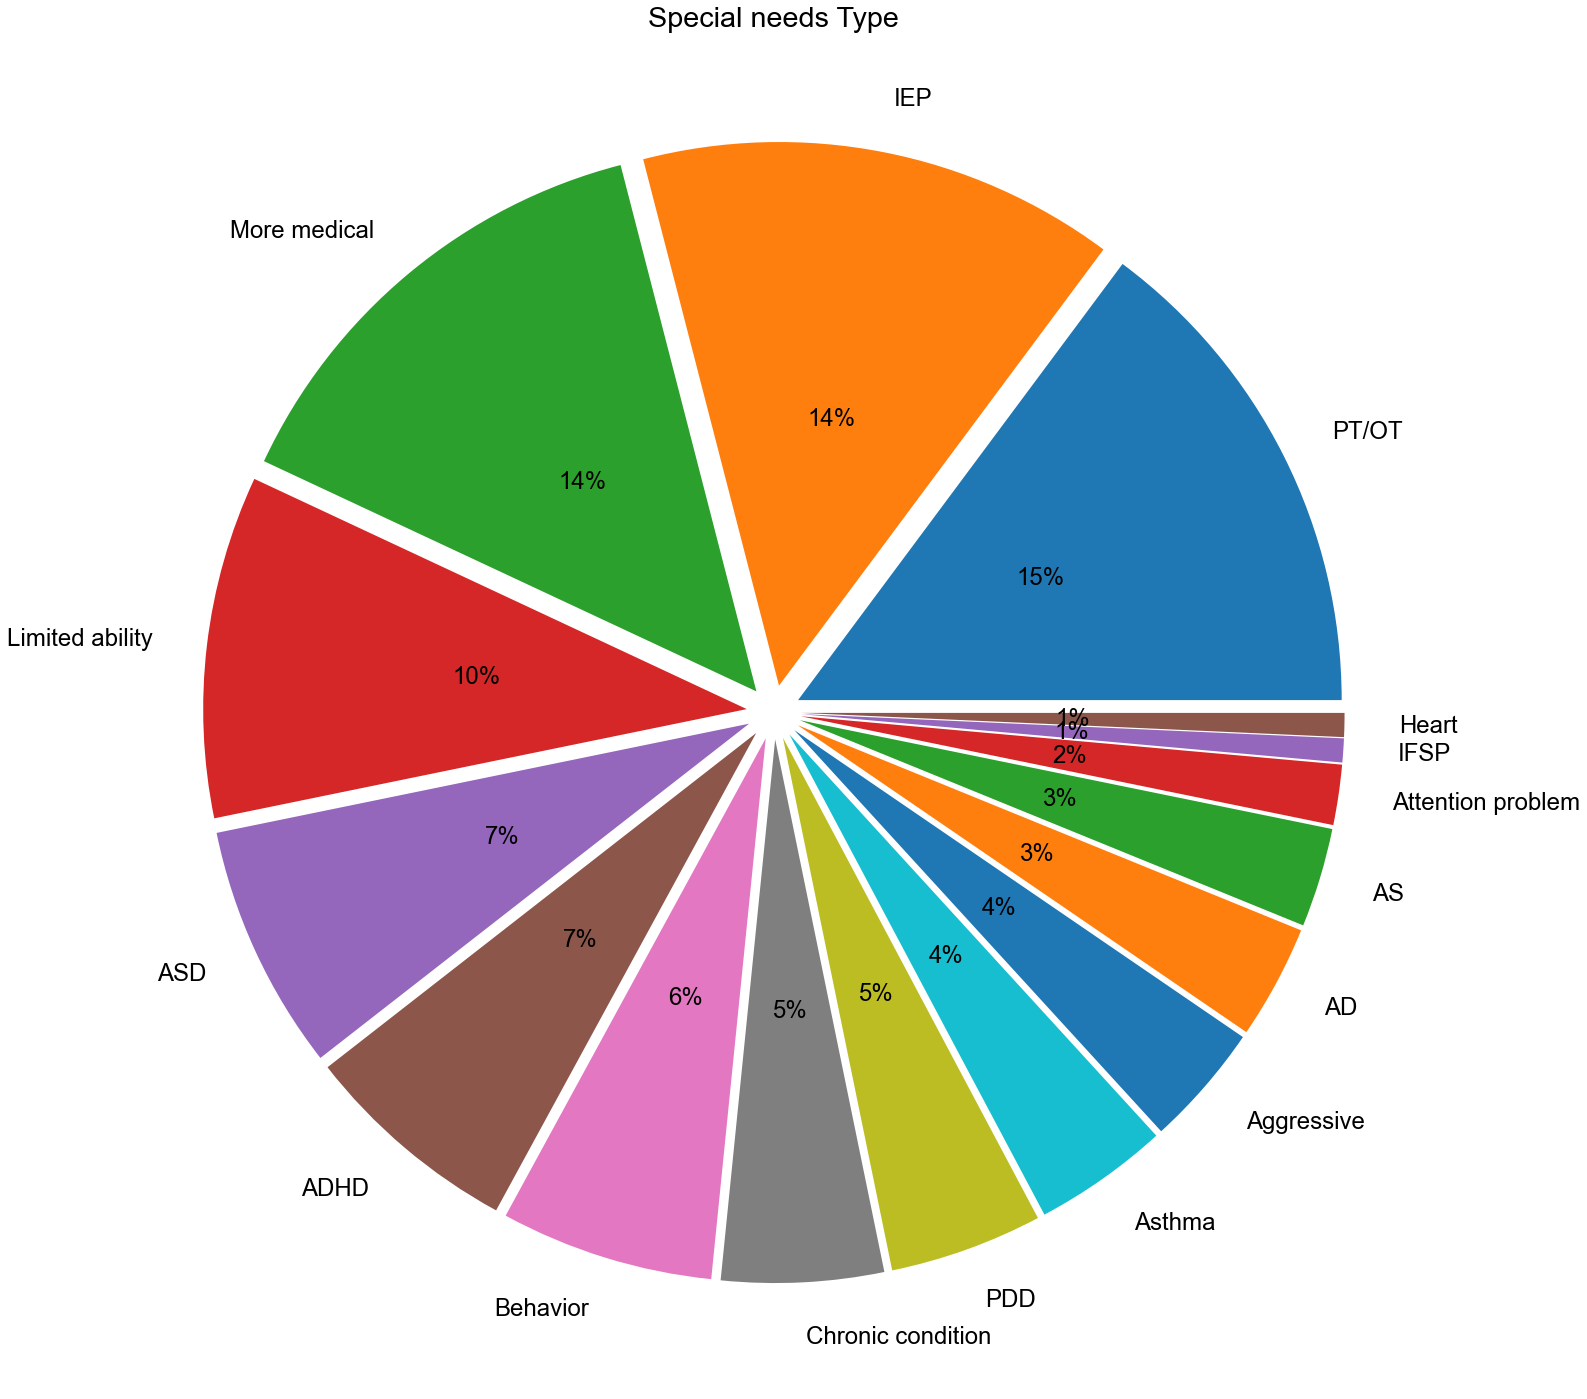

In [44]:
types = ['PT/OT', 
         'Asthma',
         'More medical',
         'ADHD',          
         'IEP',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']
types_percentages = {}
for t in types:
    types_percentages[t] = (round(100 * Special_needs_type_filtered.loc[Special_needs_type_filtered['type'] == t].shape[0]/(Special_needs_type_filtered.shape[0]),2))
    

sorted_types_percentages = sorted(types_percentages.items(), key=lambda kv: kv[1])
sorted_types_percentages = collections.OrderedDict(sorted_types_percentages)
print(list(sorted_types_percentages.keys())[::-1])
print(list(sorted_types_percentages.values())[::-1])
print(Special_needs_type_filtered.shape[0])
fig, ax = plt.subplots(figsize=(25, 25))

plt.rcParams['font.size'] = 24
labels = list(sorted_types_percentages.keys())[::-1]

percentages = list(sorted_types_percentages.values())[::-1]
explode=[0.05] * len(labels)

# theme = plt.get_cmap('Set1')
# ax.set_prop_cycle("color", [theme(1.1 * i / len(percentages))
#                              for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
# ax.axis('equal');

ax.set_title("Special needs Type")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("Special_needs_type.png")

In [45]:
ADHD_type = df_type_has_problem.loc[df_type_has_problem['type'] == 'ADHD']
other_type = df_type_has_problem.loc[df_type_has_problem['type'] != 'ADHD']
ADHD_type_filtered = pd.DataFrame() 

for ids, age in zip(list(ADHD_type['unique_id']), list(ADHD_type['child_age'])):
    temp = other_type[other_type['unique_id'] == ids]
    temp = temp[temp['child_age'] == age]
    ADHD_type_filtered = ADHD_type_filtered.append(temp)
    
ADHD_type_filtered

,unique_id,age,strata,p3,numkids,two_parent_house,regular_activity,q201,q202,q203,...,Other,Child#,has_problem,type,child_age,sex,hrs/wk in chld care,RACE,num_races,Unemployment
2806,119,37.0,NE high,2,4,yes,no,3,1,2,...,NaN,3,1,AD,8.0,male,NaN,White,1,1
2898,119,37.0,NE high,2,4,yes,no,3,1,2,...,NaN,3,1,PDD,8.0,male,NaN,White,1,1
2933,119,37.0,NE high,2,4,yes,no,3,1,2,...,NaN,3,1,AS,8.0,male,NaN,White,1,1
2967,119,37.0,NE high,2,4,yes,no,3,1,2,...,NaN,3,1,ASD,8.0,male,NaN,White,1,1
3043,119,37.0,NE high,2,4,yes,no,3,1,2,...,NaN,3,1,Behavior,8.0,male,NaN,White,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,1653,40.0,S high,1,2,yes,no,3,1,1,...,NaN,1,1,ASD,9.0,male,NaN,White,1,1
3452,1653,40.0,S high,1,2,yes,no,3,1,1,...,NaN,1,1,Special needs,9.0,male,NaN,White,1,1
3715,1653,40.0,S high,1,2,yes,no,3,1,1,...,NaN,1,1,More medical,9.0,male,NaN,White,1,1
3903,1653,40.0,S high,1,2,yes,no,3,1,1,...,NaN,1,1,Limited ability,9.0,male,NaN,White,1,1


['More medical', 'PT/OT', 'Special needs', 'IEP', 'Behavior', 'Limited ability', 'AD', 'Asthma', 'Aggressive', 'ASD', 'Chronic condition', 'PDD', 'AS', 'Attention problem', 'Heart', 'IFSP']
[14.27, 13.85, 10.21, 8.81, 8.53, 7.13, 6.57, 6.01, 5.59, 4.76, 4.06, 3.64, 3.5, 1.54, 0.98, 0.56]
715


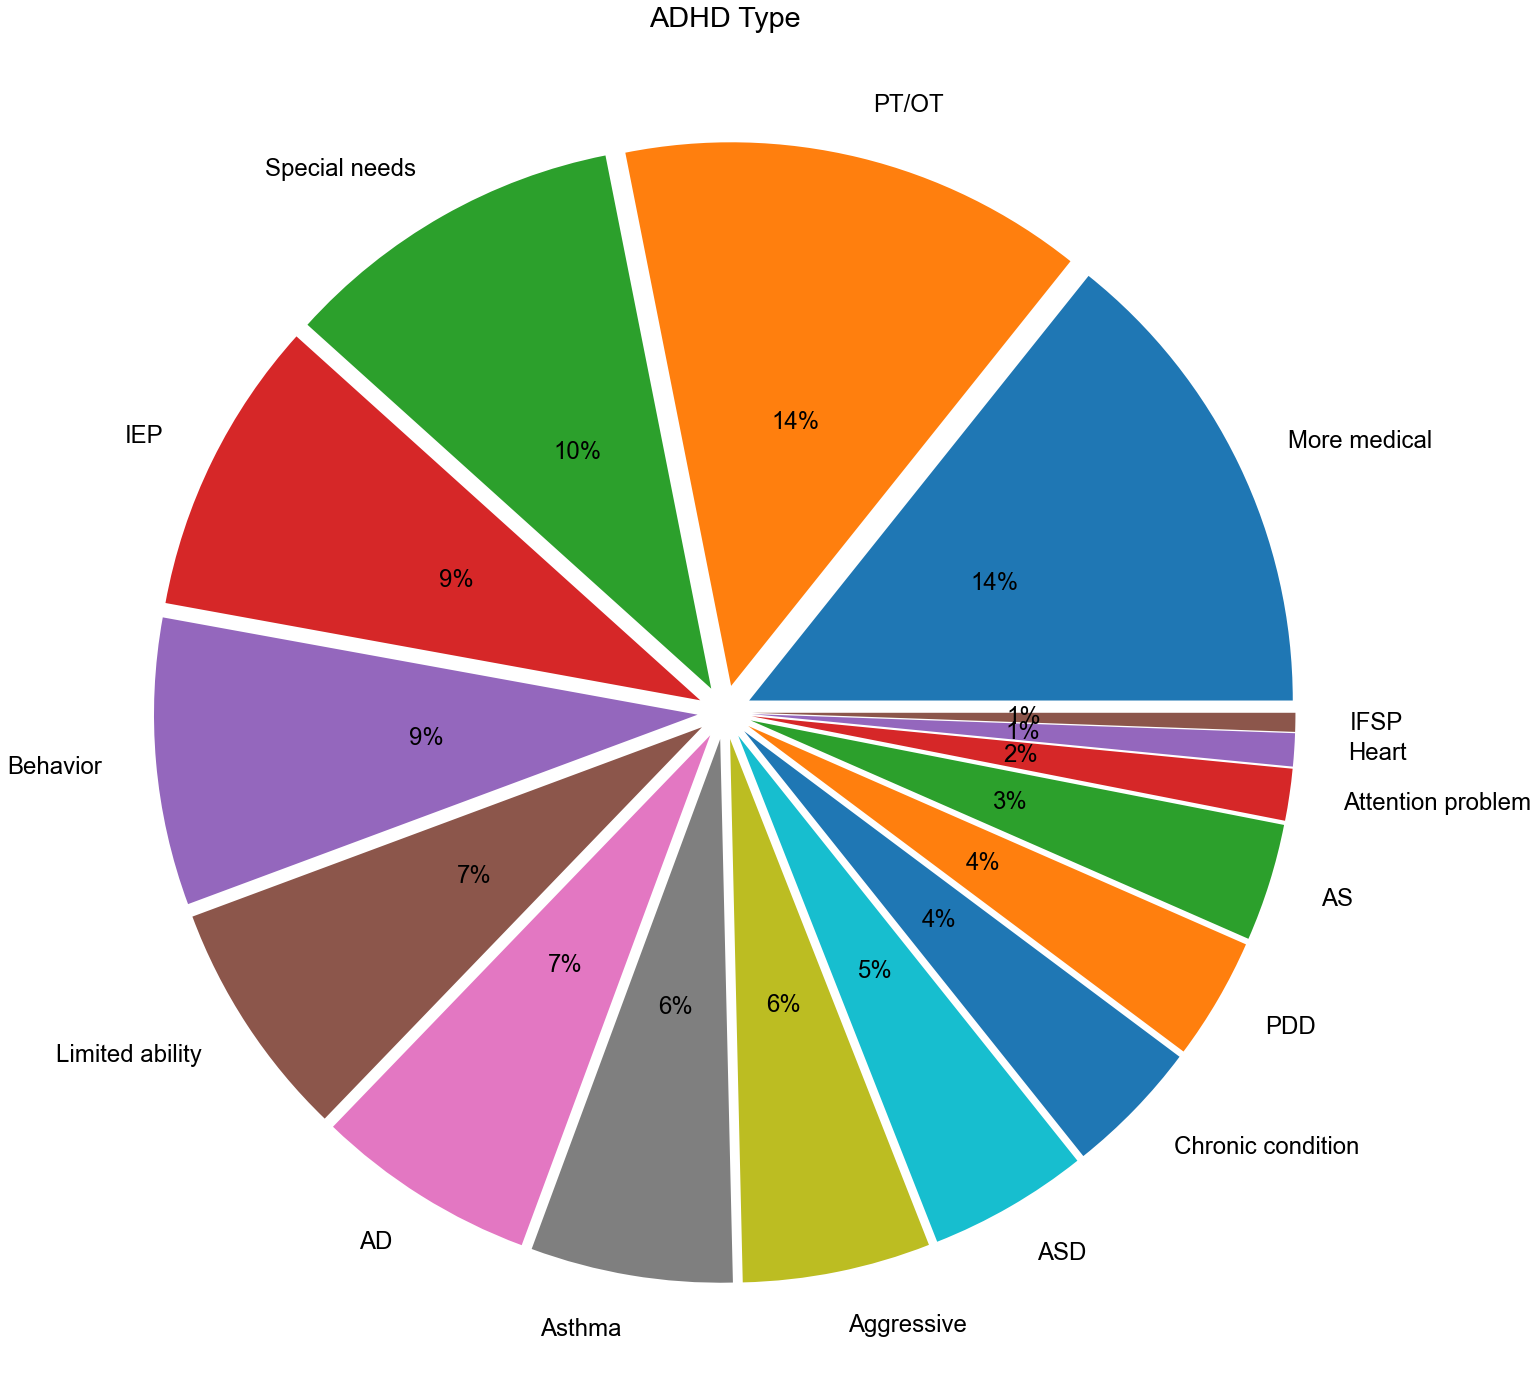

In [46]:
types = ['PT/OT', 
         'Asthma',
         'More medical',
         'Special needs',
         'IEP',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']

types_percentages = {}
for t in types:
    types_percentages[t] = (round(100 * ADHD_type_filtered.loc[ADHD_type_filtered['type'] == t].shape[0]/(ADHD_type_filtered.shape[0]),2))
    

sorted_types_percentages = sorted(types_percentages.items(), key=lambda kv: kv[1])
sorted_types_percentages = collections.OrderedDict(sorted_types_percentages)
print(list(sorted_types_percentages.keys())[::-1])
print(list(sorted_types_percentages.values())[::-1])
print(ADHD_type_filtered.shape[0])
fig, ax = plt.subplots(figsize=(25, 25))

plt.rcParams['font.size'] = 24
labels = list(sorted_types_percentages.keys())[::-1]

percentages = list(sorted_types_percentages.values())[::-1]
explode=[0.05] * len(labels)

# theme = plt.get_cmap('Set1')
# ax.set_prop_cycle("color", [theme(1.1 * i / len(percentages))
#                              for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
# ax.axis('equal');

ax.set_title("ADHD Type")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("ADHD_type.png")

In [47]:
more_than_one = grouped_df.loc[grouped_df['has_problem'] > 1]

more_than_one

,unique_id,Child#,sex,has_problem
2,115,1,male,2
3,116,1,male,7
5,119,3,male,11
6,119,4,male,3
7,122,1,male,7
...,...,...,...,...
817,1653,1,male,8
819,1657,2,male,6
820,1658,2,female,3
822,1661,1,male,2


In [48]:
more_than_one_filtered = pd.DataFrame()
for ids, num in zip(list(more_than_one['unique_id']), list(more_than_one['Child#'])):
    temp = df_type_has_problem[df_type_has_problem['unique_id'] == ids]
    temp = temp[temp['Child#'] == num]
    more_than_one_filtered = more_than_one_filtered.append(temp)

In [49]:
more_than_one_filtered['type'].value_counts()

More medical         273
PT/OT                273
Special needs        196
IEP                  167
ADHD                 152
Limited ability      148
Asthma               137
Behavior             115
Chronic condition    113
ASD                   91
AD                    87
Aggressive            68
PDD                   56
Attention problem     47
AS                    46
Heart                 26
IFSP                   8
Name: type, dtype: int64

['More medical', 'PT/OT', 'Special needs', 'IEP', 'ADHD', 'Limited ability', 'Asthma', 'Behavior', 'Chronic condition', 'ASD', 'AD', 'Aggressive', 'PDD', 'Attention problem', 'AS', 'Heart', 'IFSP']
[13.63, 13.63, 9.79, 8.34, 7.59, 7.39, 6.84, 5.74, 5.64, 4.54, 4.34, 3.39, 2.8, 2.35, 2.3, 1.3, 0.4]
2003


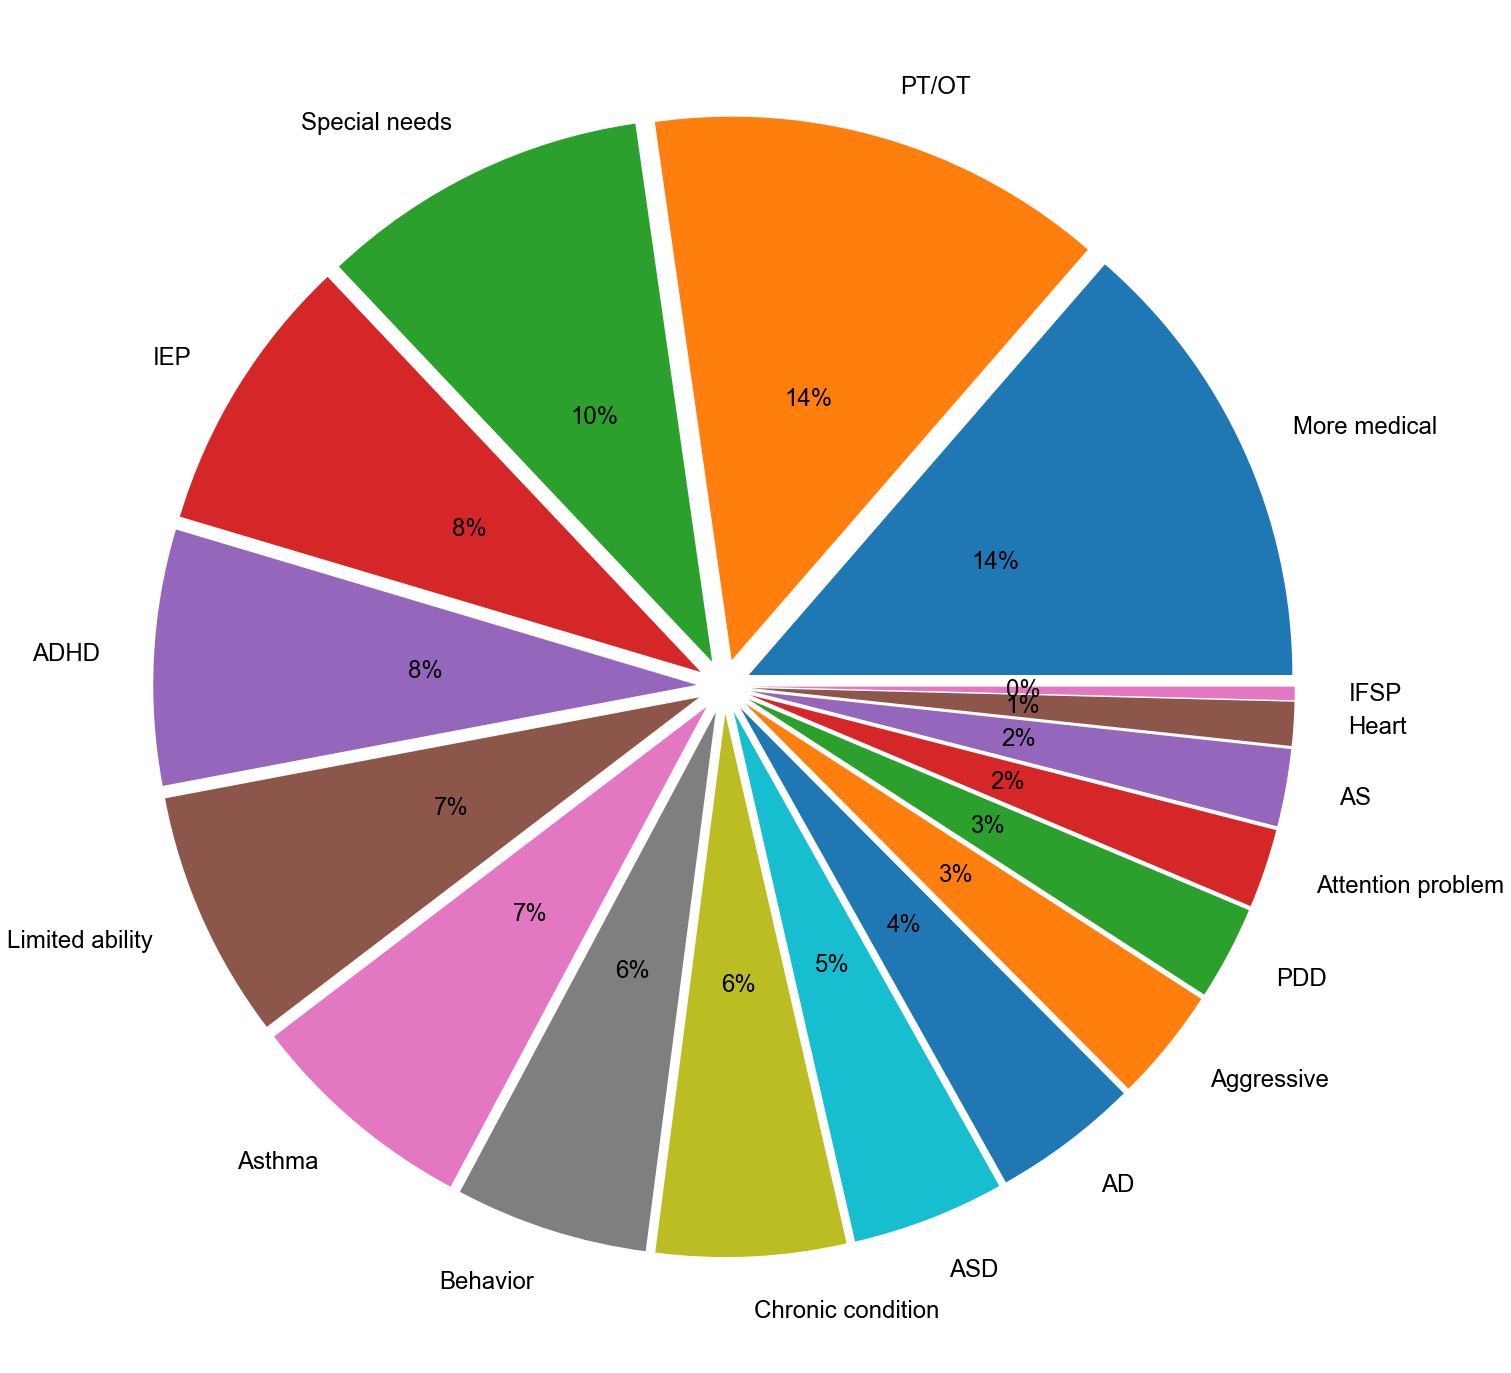

In [50]:
types = ['PT/OT', 
         'Asthma',
         'More medical',
         'Special needs',
         'ADHD',          
         'IEP',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']

types_percentages = {}
for t in types:
    types_percentages[t] = (round(100 * more_than_one_filtered.loc[more_than_one_filtered['type'] == t].shape[0]/(more_than_one_filtered.shape[0]),2))
    

sorted_types_percentages = sorted(types_percentages.items(), key=lambda kv: kv[1])
sorted_types_percentages = collections.OrderedDict(sorted_types_percentages)

print(list(sorted_types_percentages.keys())[::-1])
print(list(sorted_types_percentages.values())[::-1])
print((more_than_one_filtered.shape[0]))
fig, ax = plt.subplots(figsize=(25, 25))

plt.rcParams['font.size'] = 24
labels = list(sorted_types_percentages.keys())[::-1]

percentages = list(sorted_types_percentages.values())[::-1]
explode=[0.05] * len(labels)

# theme = plt.get_cmap('Set1')
# ax.set_prop_cycle("color", [theme(1.1 * i / len(percentages))
#                              for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
# ax.axis('equal');

# ax.set_title("Most Common Problem ")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("more_than_one.png")

In [51]:
sum([13.65, 13.65, 9.79, 8.35, 7.62, 7.42, 6.8, 5.77, 5.72, 4.48, 4.28, 3.4, 2.78, 2.32, 2.22, 1.34, 0.41])

100.0

In [52]:
less_than_one = grouped_df.loc[grouped_df['has_problem'] <= 1]

less_than_one

,unique_id,Child#,sex,has_problem
0,110,1,male,1
1,114,1,female,1
4,117,2,male,1
11,131,3,female,1
12,137,1,female,1
...,...,...,...,...
818,1656,2,male,1
821,1660,2,female,1
823,1665,1,female,1
824,1665,2,female,1


In [53]:
less_than_one_filtered = pd.DataFrame()
for ids, num in zip(list(less_than_one['unique_id']), list(less_than_one['Child#'])):
    temp = df_type_has_problem[df_type_has_problem['unique_id'] == ids]
    temp = temp[temp['Child#'] == num]
    less_than_one_filtered = less_than_one_filtered.append(temp)

['Asthma', 'PT/OT', 'ADHD', 'Attention problem', 'Chronic condition', 'Heart', 'More medical', 'Limited ability', 'Special needs', 'AD', 'Aggressive', 'Behavior', 'AS', 'PDD', 'ASD']
[41.67, 17.19, 9.9, 6.77, 5.73, 4.69, 4.17, 3.39, 1.82, 1.3, 1.04, 1.04, 0.78, 0.26, 0.26]
2003


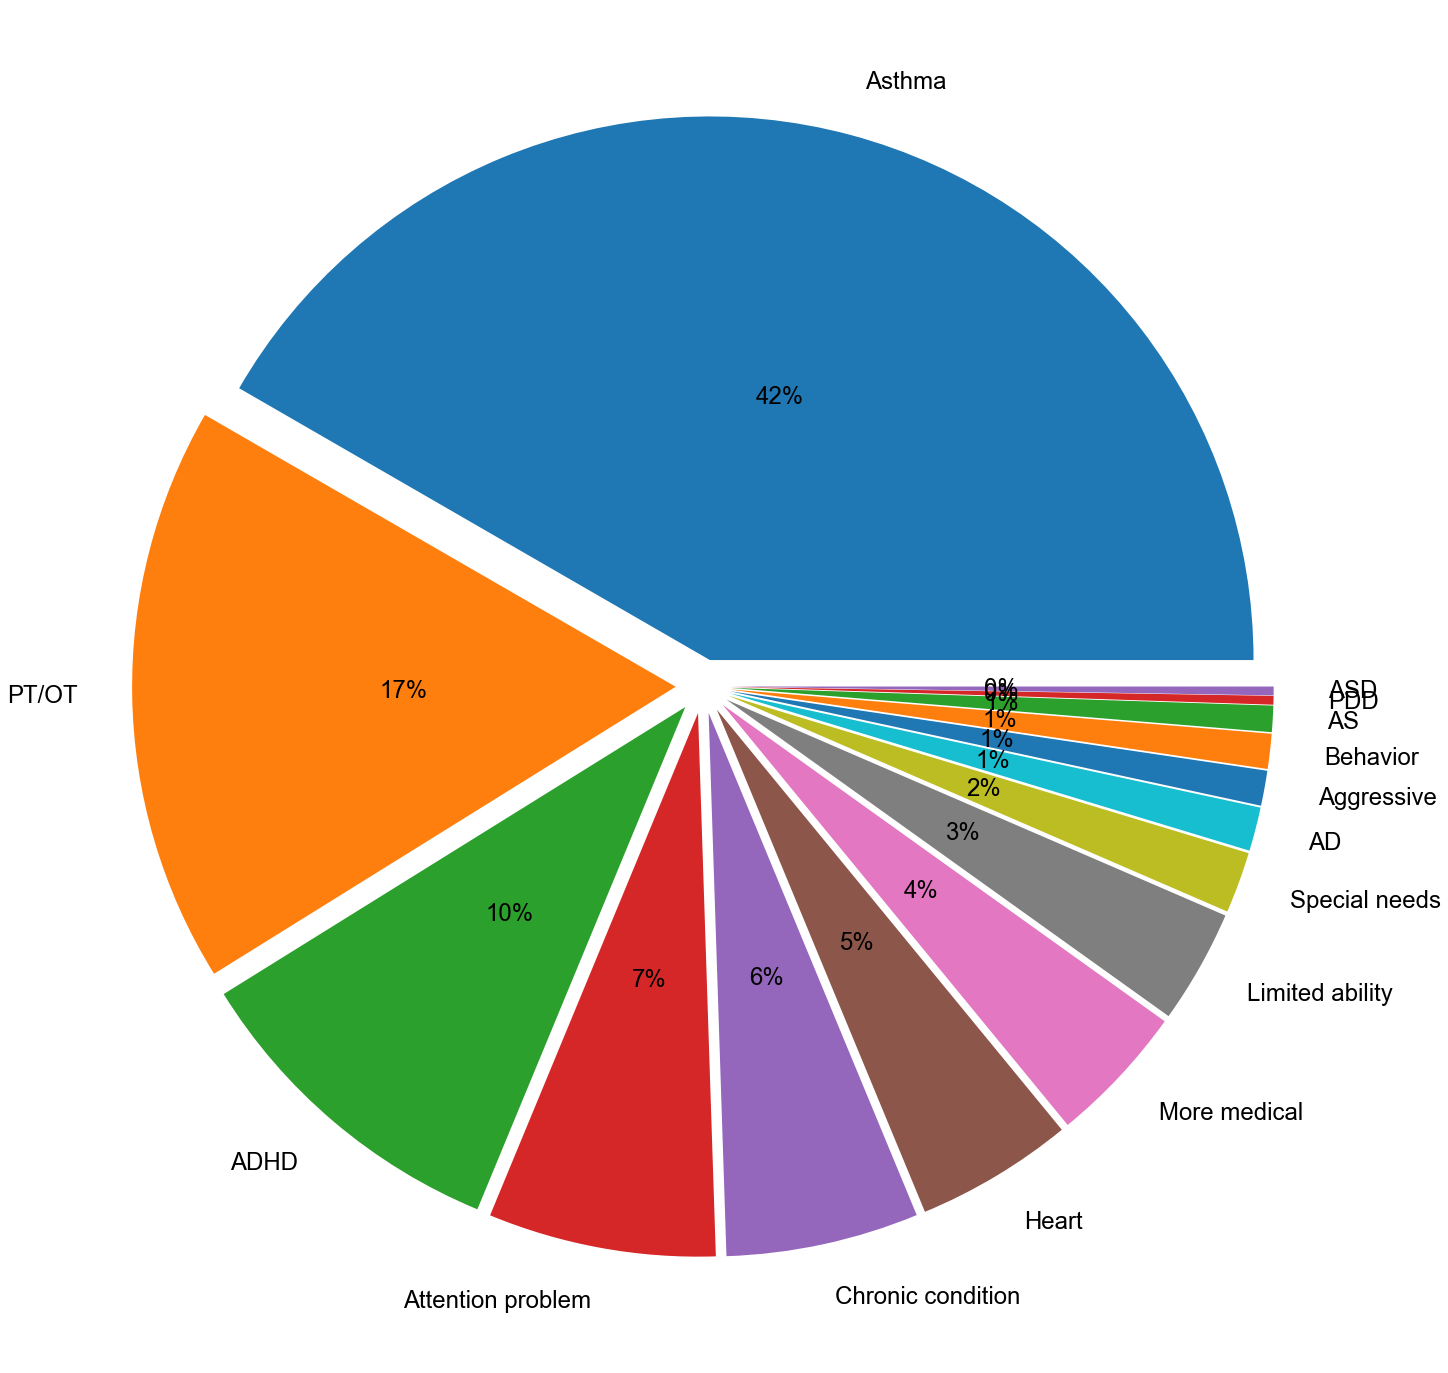

In [54]:
types = ['PT/OT', 
         'Asthma',
         'More medical',
         'Special needs',
         'ADHD',          
         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart']

types_percentages = {}
for t in types:
    types_percentages[t] = (round(100 * less_than_one_filtered.loc[less_than_one_filtered['type'] == t].shape[0]/(less_than_one_filtered.shape[0]),2))
    

sorted_types_percentages = sorted(types_percentages.items(), key=lambda kv: kv[1])
sorted_types_percentages = collections.OrderedDict(sorted_types_percentages)

print(list(sorted_types_percentages.keys())[::-1])
print(list(sorted_types_percentages.values())[::-1])
print((more_than_one_filtered.shape[0]))
fig, ax = plt.subplots(figsize=(25, 25))

plt.rcParams['font.size'] = 24
labels = list(sorted_types_percentages.keys())[::-1]

percentages = list(sorted_types_percentages.values())[::-1]
explode=[0.05] * len(labels)

# theme = plt.get_cmap('Set1')
# ax.set_prop_cycle("color", [theme(1.1 * i / len(percentages))
#                              for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
# ax.axis('equal');

# ax.set_title("Most Common Problem ")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("less_than_one.png")